## Project : 4

## Earthquake Damage Prediction

## Problem Statement

Task 1 :- Prepare a complete data analysis report (EDA) on the given data.

Task 2 :- Create a best predictive model in such a way that to predict the ordinal variable "damage_grade". This column represents the level of damage affected by the Earthquake.

Task 3 :- Suggestions to the Sesimologists to avoid significant damge to many buildings by earthquake event by analyzing which factor contributes more damage to buildings.

In [2]:
#import basic libraries.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, f1_score, recall_score 


In [2]:
import pandas as pd 

# Load the CSV files into pandas DataFrames
train_values = pd.read_csv(r"train_values.csv")
train_labels = pd.read_csv(r"train_labels.csv")

# Merge both datasets on building id
df = pd.merge(train_values, train_labels, on='building_id')

In [3]:
df

building_id  geo_level_1_id  geo_level_2_id  geo_level_3_id  \
0            802906               6             487           12198   
1             28830               8             900            2812   
2             94947              21             363            8973   
3            590882              22             418           10694   
4            201944              11             131            1488   
...             ...             ...             ...             ...   
260596       688636              25            1335            1621   
260597       669485              17             715            2060   
260598       602512              17              51            8163   
260599       151409              26              39            1851   
260600       747594              21               9            9101   

        count_floors_pre_eq  age  area_percentage  height_percentage  \
0                         2   30                6                  5   
1                         2   10                8                  7   
2                         2   10                5                  5   
3                         2   10                6                  5   
4                         3   30                8                  9   
...                     ...  ...              ...                ...   
260596                    1   55                6                  3   
260597                    2    0                6                  5   
260598                    3   55                6                  7   
260599                    2   10               14                  6   
260600                    3   10                7                  6   

       land_surface_condition foundation_type  ... has_secondary_use_hotel  \
0                           t               r  ...                       0   
1                           o               r  ...                       0   
2                           t               r  ...                       0   
3                           t               r  ...                       0   
4                           t               r  ...                       0   
...                       ...             ...  ...                     ...   
260596                      n               r  ...                       0   
260597                      t               r  ...                       0   
260598                      t               r  ...                       0   
260599                      t               r  ...                       0   
260600                      n               r  ...                       0   

       has_secondary_use_rental has_secondary_use_institution  \
0                             0                             0   
1                             0                             0   
2                             0                             0   
3                             0                             0   
4                             0                             0   
...                         ...                           ...   
260596                        0                             0   
260597                        0                             0   
260598                        0                             0   
260599                        0                             0   
260600                        0                             0   

       has_secondary_use_school has_secondary_use_industry  \
0                             0                          0   
1                             0                          0   
2                             0                          0   
3                             0                          0   
4                             0                          0   
...                         ...                        ...   
260596                        0                          0   
260597                        0                          0   
260598        

## Basic checks

In [4]:
df.head(10)

building_id  geo_level_1_id  geo_level_2_id  geo_level_3_id  \
0       802906               6             487           12198   
1        28830               8             900            2812   
2        94947              21             363            8973   
3       590882              22             418           10694   
4       201944              11             131            1488   
5       333020               8             558            6089   
6       728451               9             475           12066   
7       475515              20             323           12236   
8       441126               0             757            7219   
9       989500              26             886             994   

   count_floors_pre_eq  age  area_percentage  height_percentage  \
0                    2   30                6                  5   
1                    2   10                8                  7   
2                    2   10                5                  5   
3                    2   10                6                  5   
4                    3   30                8                  9   
5                    2   10                9                  5   
6                    2   25                3                  4   
7                    2    0                8                  6   
8                    2   15                8                  6   
9                    1    0               13                  4   

  land_surface_condition foundation_type  ... has_secondary_use_hotel  \
0                      t               r  ...                       0   
1                      o               r  ...                       0   
2                      t               r  ...                       0   
3                      t               r  ...                       0   
4                      t               r  ...                       0   
5                      t               r  ...                       0   
6                      n               r  ...                       0   
7                      t               w  ...                       0   
8                      t               r  ...                       0   
9                      t               i  ...                       0   

  has_secondary_use_rental has_secondary_use_institution  \
0                        0                             0   
1                        0                             0   
2                        0                             0   
3                        0                             0   
4                        0                             0   
5                        0                             0   
6                        0                             0   
7                        0                             0   
8                        0                             0   
9                        0                             0   

  has_secondary_use_school has_secondary_use_industry  \
0                        0                          0   
1                        0                          0   
2                        0                          0   
3                        0                          0   
4                        0                          0   
5                        0                          0   
6                        0                          0   
7                        0                          0   
8                        0                          0   
9                        0                          0   

   has_secondary_use_health_post  has_secondary_use_gov_office  \
0                              0                             0   
1                              0                             0   
2                              0                             0   
3                              0                             0   
4                              0                             0   
5                              0                 

In [5]:
df.tail(10)

building_id  geo_level_1_id  geo_level_2_id  geo_level_3_id  \
260591       560805              20             368            5980   
260592       207683              10            1382            1903   
260593       226421               8             767            8613   
260594       159555              27             181            1537   
260595       827012               8             268            4718   
260596       688636              25            1335            1621   
260597       669485              17             715            2060   
260598       602512              17              51            8163   
260599       151409              26              39            1851   
260600       747594              21               9            9101   

        count_floors_pre_eq  age  area_percentage  height_percentage  \
260591                    1   25                5                  3   
260592                    2   25                5                  5   
260593                    2    5               13                  5   
260594                    6    0               13                 12   
260595                    2   20                8                  5   
260596                    1   55                6                  3   
260597                    2    0                6                  5   
260598                    3   55                6                  7   
260599                    2   10               14                  6   
260600                    3   10                7                  6   

       land_surface_condition foundation_type  ... has_secondary_use_hotel  \
260591                      n               r  ...                       0   
260592                      t               r  ...                       0   
260593                      t               r  ...                       0   
260594                      t               r  ...                       0   
260595                      t               r  ...                       0   
260596                      n               r  ...                       0   
260597                      t               r  ...                       0   
260598                      t               r  ...                       0   
260599                      t               r  ...                       0   
260600                      n               r  ...                       0   

       has_secondary_use_rental has_secondary_use_institution  \
260591                        0                             0   
260592                        0                             0   
260593                        0                             0   
260594                        0                             0   
260595                        0                             0   
260596                        0                             0   
260597                        0                             0   
260598                        0                             0   
260599                        0                             0   
260600                        0                             0   

       has_secondary_use_school has_secondary_use_industry  \
260591                        0                          0   
260592                        0                          0   
260593                        0                          0   
260594                        0                          0   
260595                        0                          0   
260596                        0                          0   
260597                        0                          0   
260598                        0                          0   
260599                        0                          0   
260600                        0                          0   

        has_secondary_use_health_post  has_secondary_use_gov_office  \
260591                              0                             0   
260592                           

In [10]:
df.shape

(260601, 40)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 40 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   building_id                             260601 non-null  int64 
 1   geo_level_1_id                          260601 non-null  int64 
 2   geo_level_2_id                          260601 non-null  int64 
 3   geo_level_3_id                          260601 non-null  int64 
 4   count_floors_pre_eq                     260601 non-null  int64 
 5   age                                     260601 non-null  int64 
 6   area_percentage                         260601 non-null  int64 
 7   height_percentage                       260601 non-null  int64 
 8   land_surface_condition                  260601 non-null  object
 9   foundation_type                         260601 non-null  object
 10  roof_type                               260601 non-null 

In [12]:
df.describe().T

count           mean  \
building_id                             260601.0  525675.482773   
geo_level_1_id                          260601.0      13.900353   
geo_level_2_id                          260601.0     701.074685   
geo_level_3_id                          260601.0    6257.876148   
count_floors_pre_eq                     260601.0       2.129723   
age                                     260601.0      26.535029   
area_percentage                         260601.0       8.018051   
height_percentage                       260601.0       5.434365   
has_superstructure_adobe_mud            260601.0       0.088645   
has_superstructure_mud_mortar_stone     260601.0       0.761935   
has_superstructure_stone_flag           260601.0       0.034332   
has_superstructure_cement_mortar_stone  260601.0       0.018235   
has_superstructure_mud_mortar_brick     260601.0       0.068154   
has_superstructure_cement_mortar_brick  260601.0       0.075268   
has_superstructure_timber               260601.0       0.254988   
has_superstructure_bamboo               260601.0       0.085011   
has_superstructure_rc_non_engineered    260601.0       0.042590   
has_superstructure_rc_engineered        260601.0       0.015859   
has_superstructure_other                260601.0       0.014985   
count_families                          260601.0       0.983949   
has_secondary_use                       260601.0       0.111880   
has_secondary_use_agriculture           260601.0       0.064378   
has_secondary_use_hotel                 260601.0       0.033626   
has_secondary_use_rental                260601.0       0.008101   
has_secondary_use_institution           260601.0       0.000940   
has_secondary_use_school                260601.0       0.000361   
has_secondary_use_industry              260601.0       0.001071   
has_secondary_use_health_post           260601.0       0.000188   
has_secondary_use_gov_office            260601.0       0.000146   
has_secondary_use_use_police            260601.0       0.000088   
has_secondary_use_other                 260601.0       0.005119   
damage_grade                            260601.0       2.238272   

                                                  std  min       25%  \
building_id                             304544.999032  4.0  261190.0   
geo_level_1_id                               8.033617  0.0       7.0   
geo_level_2_id                             412.710734  0.0     350.0   
geo_level_3_id                            3646.369645  0.0    3073.0   
count_floors_pre_eq                          0.727665  1.0       2.0   
age                                         73.565937  0.0      10.0   
area_percentage                              4.392231  1.0       5.0   
height_percentage                            1.918418  2.0       4.0   
has_superstructure_adobe_mud                 0.284231  0.0       0.0   
has_superstructure_mud_mortar_stone          0.425900  0.0       1.0   
has_superstructure_stone_flag                0.182081  0.0       0.0   
has_superstructure_cement_mortar_stone       0.133800  0.0       0.0   
has_superstructure_mud_mortar_brick          0.252010  0.0       0.0   
has_superstructure_cement_mortar_brick       0.263824  0.0       0.0   
has_superstructure_timber                    0.435855  0.0       0.0   
has_superstructure_bamboo                    0.278899  0.0       0.0   
has_superstructure_rc_non_engineered         0.201931  0.0       0.0   
has_superstructure_rc_engineered             0.124932  0.0       0.0   
has_superstructure_other                     0.121491  0.0       0.0   
count_families                               0.418389  0.0       1.0   
has_secondary_use                            0.315219  0.0       0.0   
has_secondary_use_agriculture                0.245426  0.0       0.0   
has_secondary_use_hotel                      0.180265  0.0       0.0   
has_secondary_use_rental                     0.089638  0.0       0.0   
has_secondary_use_institution  

In [13]:
df.describe(include='O')

land_surface_condition foundation_type roof_type ground_floor_type  \
count                  260601          260601    260601            260601   
unique                      3               5         3                 5   
top                         t               r         n                 f   
freq                   216757          219196    182842            209619   

       other_floor_type position plan_configuration legal_ownership_status  
count            260601   260601             260601                 260601  
unique                4        4                 10                      4  
top                   q        s                  d                      v  
freq             165282   202090             250072                 250939

In [14]:
df.columns

Index(['building_id', 'geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
       'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage',
       'land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'legal_ownership_status', 'count_families', 'has_secondary_use',
       'has_secondary_use_agriculture', 'has_secondary_use_hotel',
       'has_secondary_use_rental', 'has_secondary_use_institution',
       'has_secondary_use_school', 'has_secondary_use_i

In [15]:
# check for null & dupicated values
df.isnull().sum()

building_id                               0
geo_level_1_id                            0
geo_level_2_id                            0
geo_level_3_id                            0
count_floors_pre_eq                       0
age                                       0
area_percentage                           0
height_percentage                         0
land_surface_condition                    0
foundation_type                           0
roof_type                                 0
ground_floor_type                         0
other_floor_type                          0
position                                  0
plan_configuration                        0
has_superstructure_adobe_mud              0
has_superstructure_mud_mortar_stone       0
has_superstructure_stone_flag             0
has_superstructure_cement_mortar_stone    0
has_superstructure_mud_mortar_brick       0
has_superstructure_cement_mortar_brick    0
has_superstructure_timber                 0
has_superstructure_bamboo       

In [16]:
df.duplicated().sum()

0

There are no null and duplicated values in dataset

In [6]:
# TO check unique values & value_counts of each feature
for col in df.columns:
    print(f"value counts of : {col}")
    
    print(df[col].value_counts().sort_index())

    print("\n")
    

value counts of : building_id
building_id
4          1
8          1
12         1
16         1
17         1
          ..
1052921    1
1052926    1
1052929    1
1052931    1
1052934    1
Name: count, Length: 260601, dtype: int64


value counts of : geo_level_1_id
geo_level_1_id
0      4011
1      2701
2       931
3      7540
4     14568
5      2690
6     24381
7     18994
8     19080
9      3958
10    22079
11     8220
12     3194
13     9608
14     1714
15     2320
16     4332
17    21813
18     3189
19      372
20    17216
21    14889
22     6252
23     1121
24     1310
25     5624
26    22615
27    12532
28      265
29      396
30     2686
Name: count, dtype: int64


value counts of : geo_level_2_id
geo_level_2_id
0        38
1       204
3        77
4       315
5        25
       ... 
1423      3
1424      7
1425    466
1426    286
1427      6
Name: count, Length: 1414, dtype: int64


value counts of : geo_level_3_id
geo_level_3_id
0         2
1         6
3         9
5        14
6    

In [7]:
# Get unique values of categorical data
for col in df.columns:
    if df[col].dtype == 'object':
        print(f"{col} -- Unique values : {df[col].unique()}")
        print("\n")
    

land_surface_condition -- Unique values : ['t' 'o' 'n']


foundation_type -- Unique values : ['r' 'w' 'i' 'u' 'h']


roof_type -- Unique values : ['n' 'q' 'x']


ground_floor_type -- Unique values : ['f' 'x' 'v' 'z' 'm']


other_floor_type -- Unique values : ['q' 'x' 'j' 's']


position -- Unique values : ['t' 's' 'j' 'o']


plan_configuration -- Unique values : ['d' 'u' 's' 'q' 'm' 'c' 'a' 'n' 'f' 'o']


legal_ownership_status -- Unique values : ['v' 'a' 'r' 'w']




In [8]:
df['damage_grade'].value_counts().sort_index()

damage_grade
1     25124
2    148259
3     87218
Name: count, dtype: int64

As it is ordinal target belongs to classifier problem where Target variable with order or hierarchy its data should be always balanced and Data is moderately imbalanced we can balance the data later.

## EDA (Exploratory Data Analysis)
Plotting histogram for all features

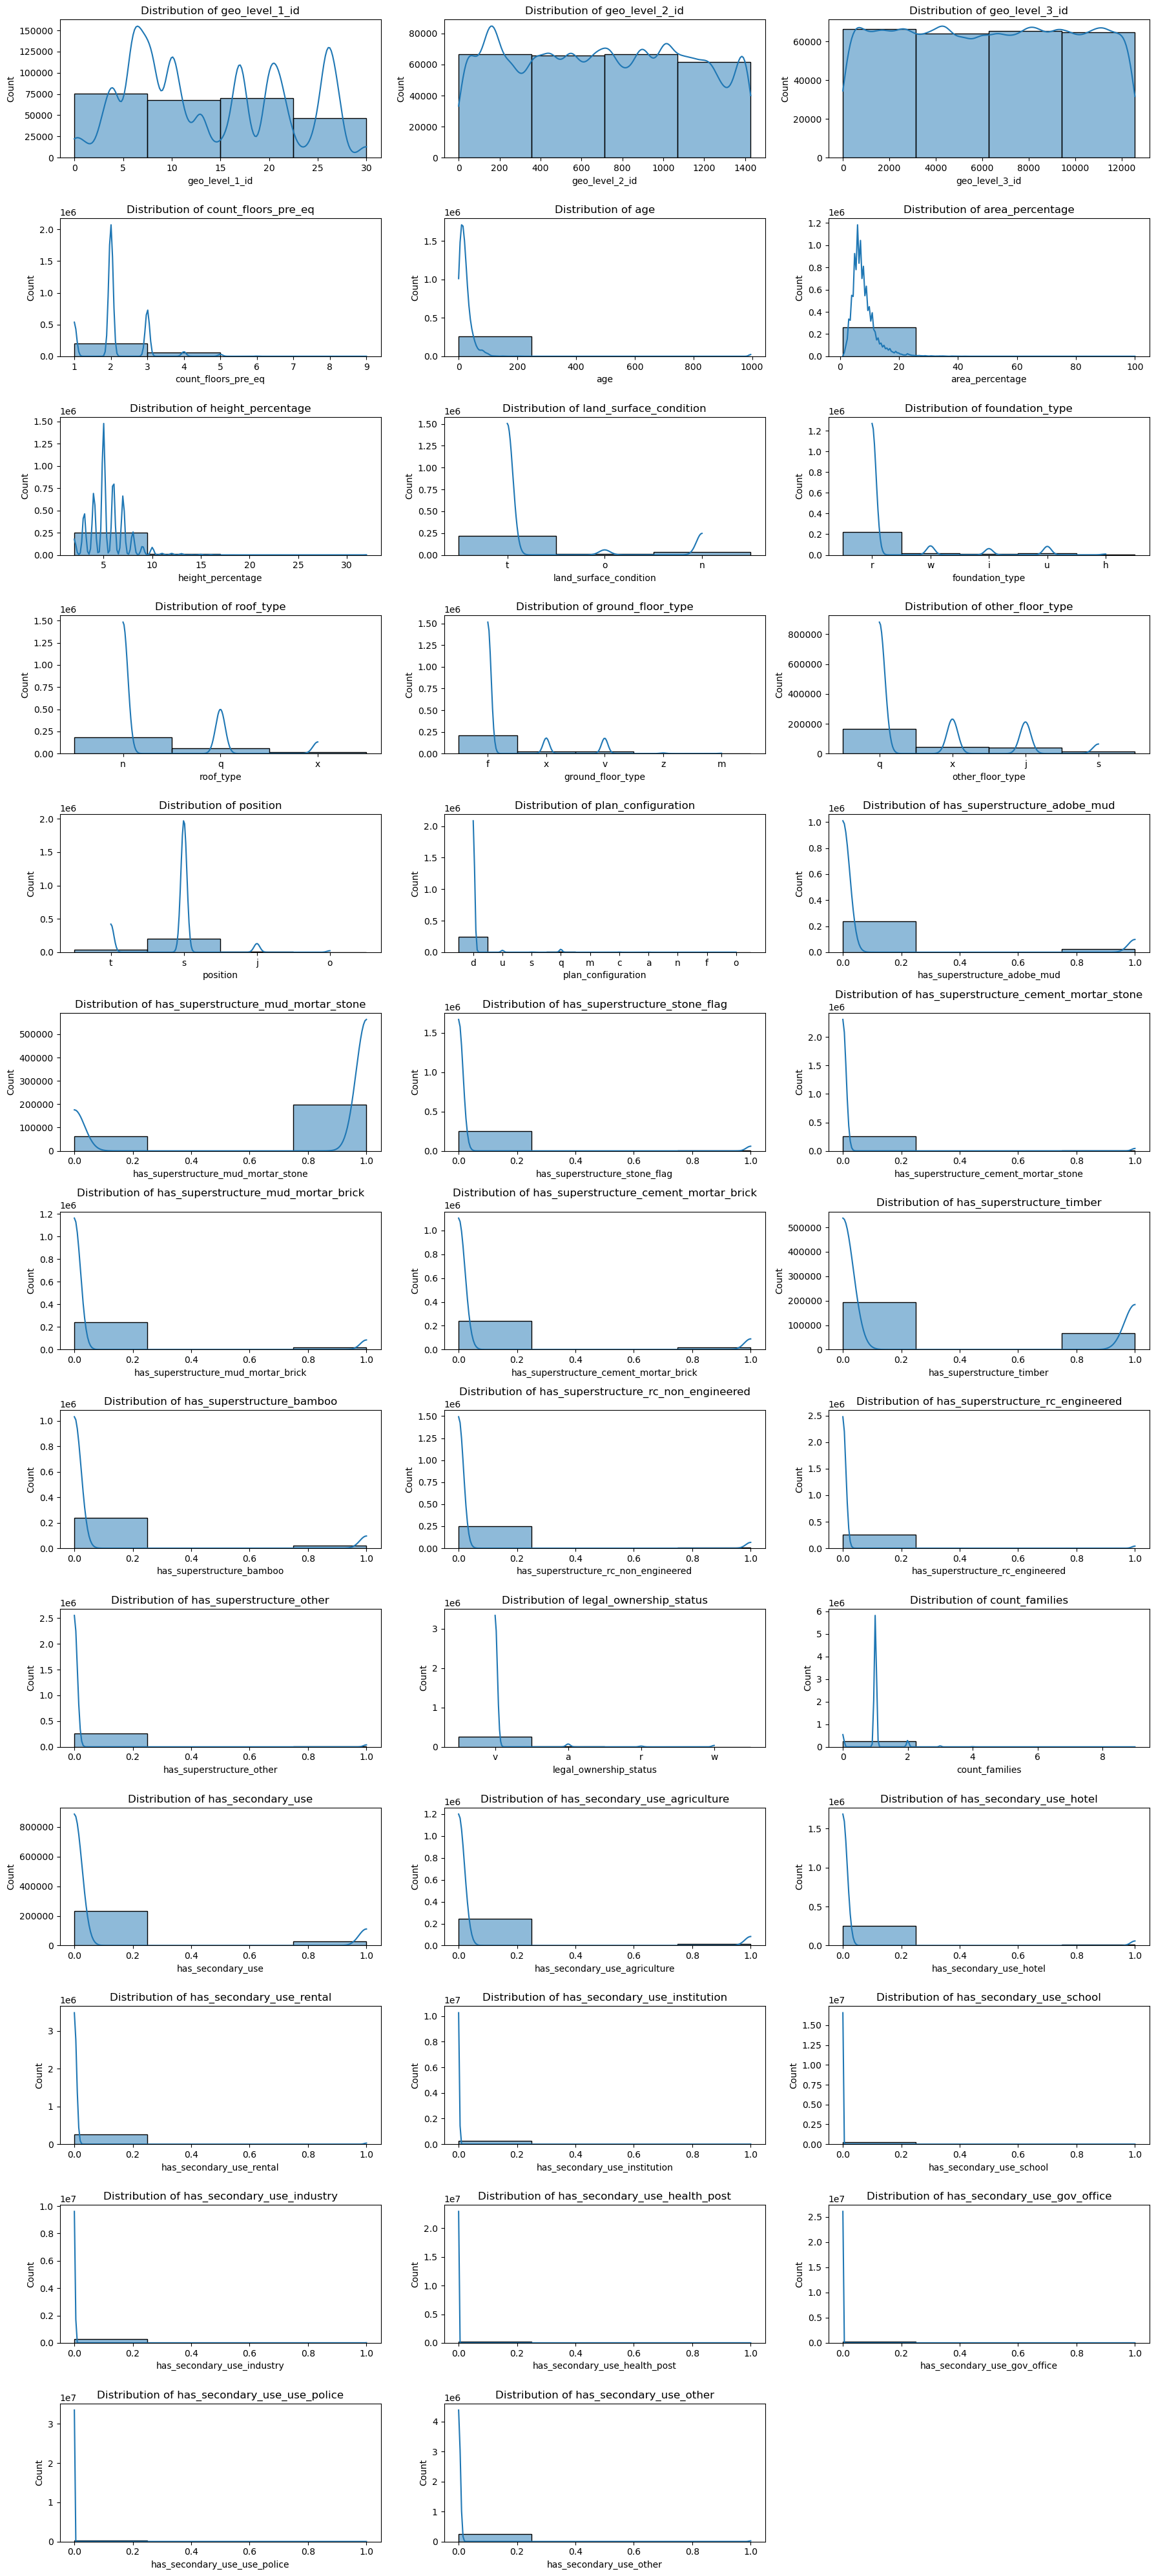

In [18]:
# plot histplot
features = df.columns.drop(['damage_grade', 'building_id'])

plt.figure(figsize=(18,40))
for i, col in enumerate(features,1):
    plt.subplot(13,3,i)
    sns.histplot(df[col], bins=4, kde=True)
    plt.title(f"Distribution of {col}")
    plt.tight_layout()
plt.show()

 From above analysis we can conclude that :
 1. Distribution of geo_level_1 id : It range extends from 0 to 30 it indicates largest affected region where building exists.
 
 2. Distribution of geo_level_2 id : It range extends from 350 to 1427 it indicates medium affected region where building exists.
 
 3. Distribution of geo_level_3 id : It range extends from 0 to 12567 it indictes less affected most specific sub-region where building exists.
 
 4. Distribution of count of floors in buildings before earthquake : There are maximum of 1 to 3 floors and 4 to 5 floors are medium numbers of    buildings exists and finally tall buildings which contain more than 7 floors are rarely present in the earthquake affected area.
 
 5. Distribution of age of buildings : There are more buildings present, those ages of buildings are 0 to 200 years and 900 to 1000 years age of buildings also exists and they are mostly ancient carving buildings.

 6. The maximum proportion of buildings which are made up of mud_mortar_stone contains 199569 out of 260000 and buildings superstructures made up of timber, bamboo, mud_mortar_brick, cement_mortar_brick, adobe_mud are largely exists. The engineered RCC concrete buildings are rarely exists.

 7. The Distribution of buildings which are secondary_use buildings symbolizes the buildings used for other purposes than home. It indicates Agricultural buildings, hotel buildings, School and Institutions are largely present whereas Govt buildings and Police station buildings are rarely present.

## Damage Grade : from 1 to 3 conveys less, medium to complete destruction of buildings
    1.25124 -- less number of buildings affected with mild severity (about 10% of the buildings are quite safe)
    2.48259 -- more number of buildings affected severely (about more than 50% of the buildings)
    3.87218 -- Complete Destruction of buildings is also high in numbers   (nearly 40% of the buildings)

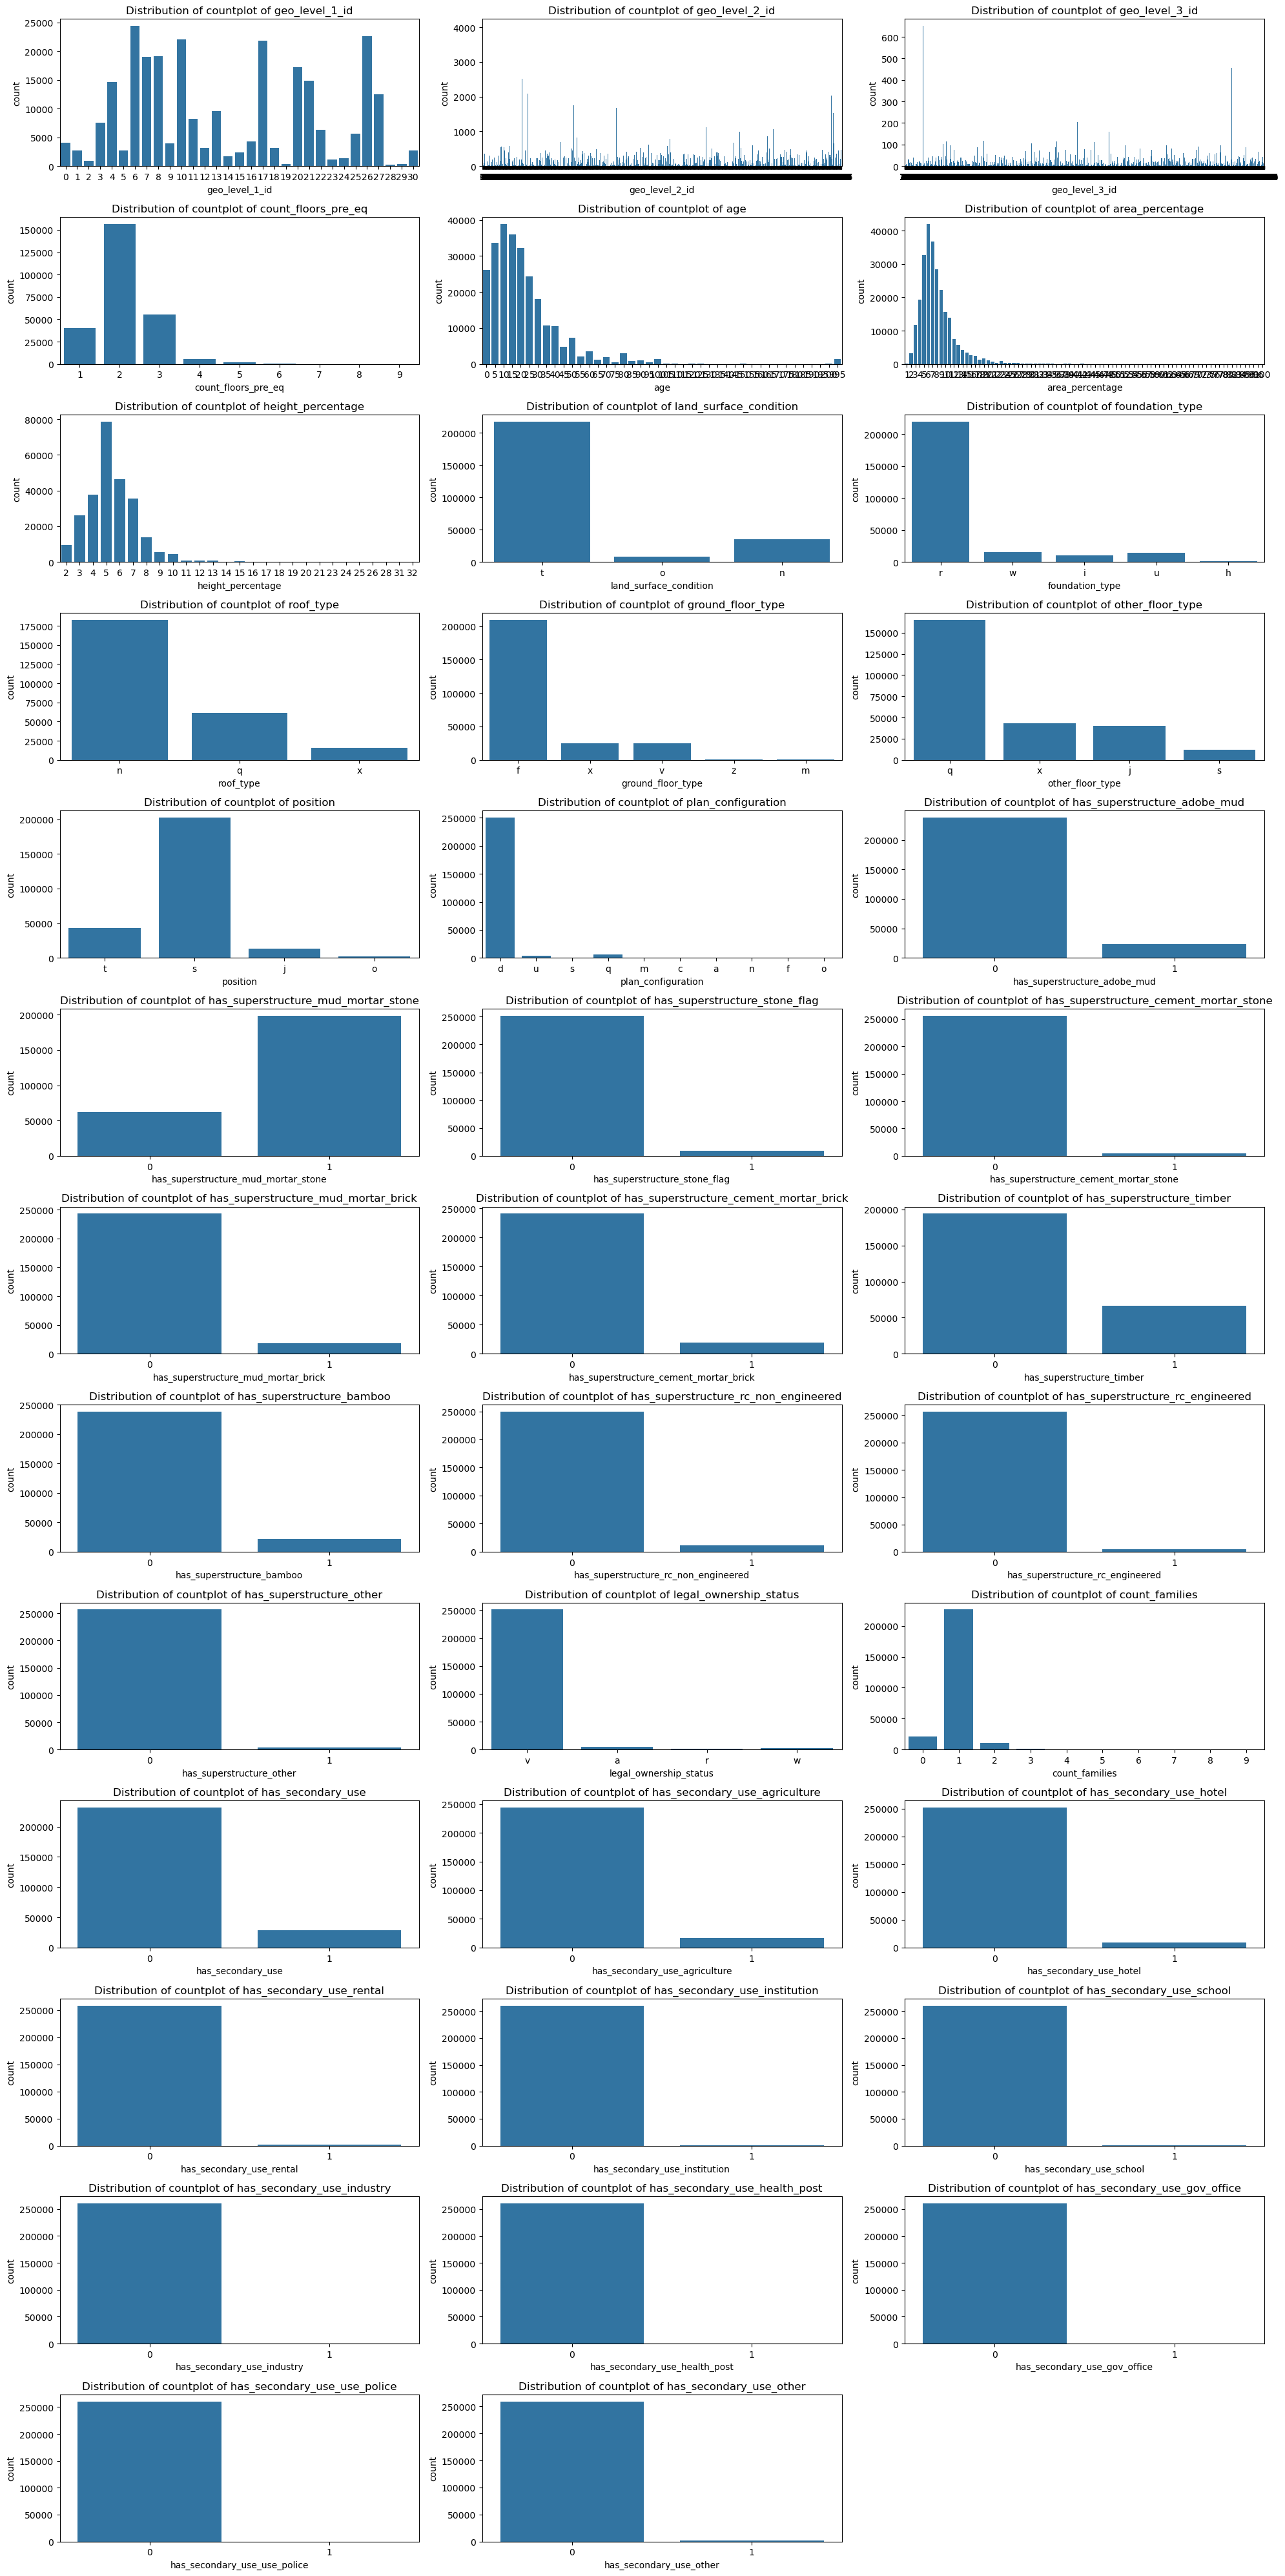

In [18]:
# Plot countplot for features
features = df.drop(['damage_grade','building_id'], axis=1)

plt.figure(figsize=(20,40))
for i, col in enumerate(features, 1):
    plt.subplot(13,3,i)
    sns.countplot(data=df, x=col)
    plt.title(f"Distribution of countplot of {col}")
    plt.tight_layout()
plt.show()
    

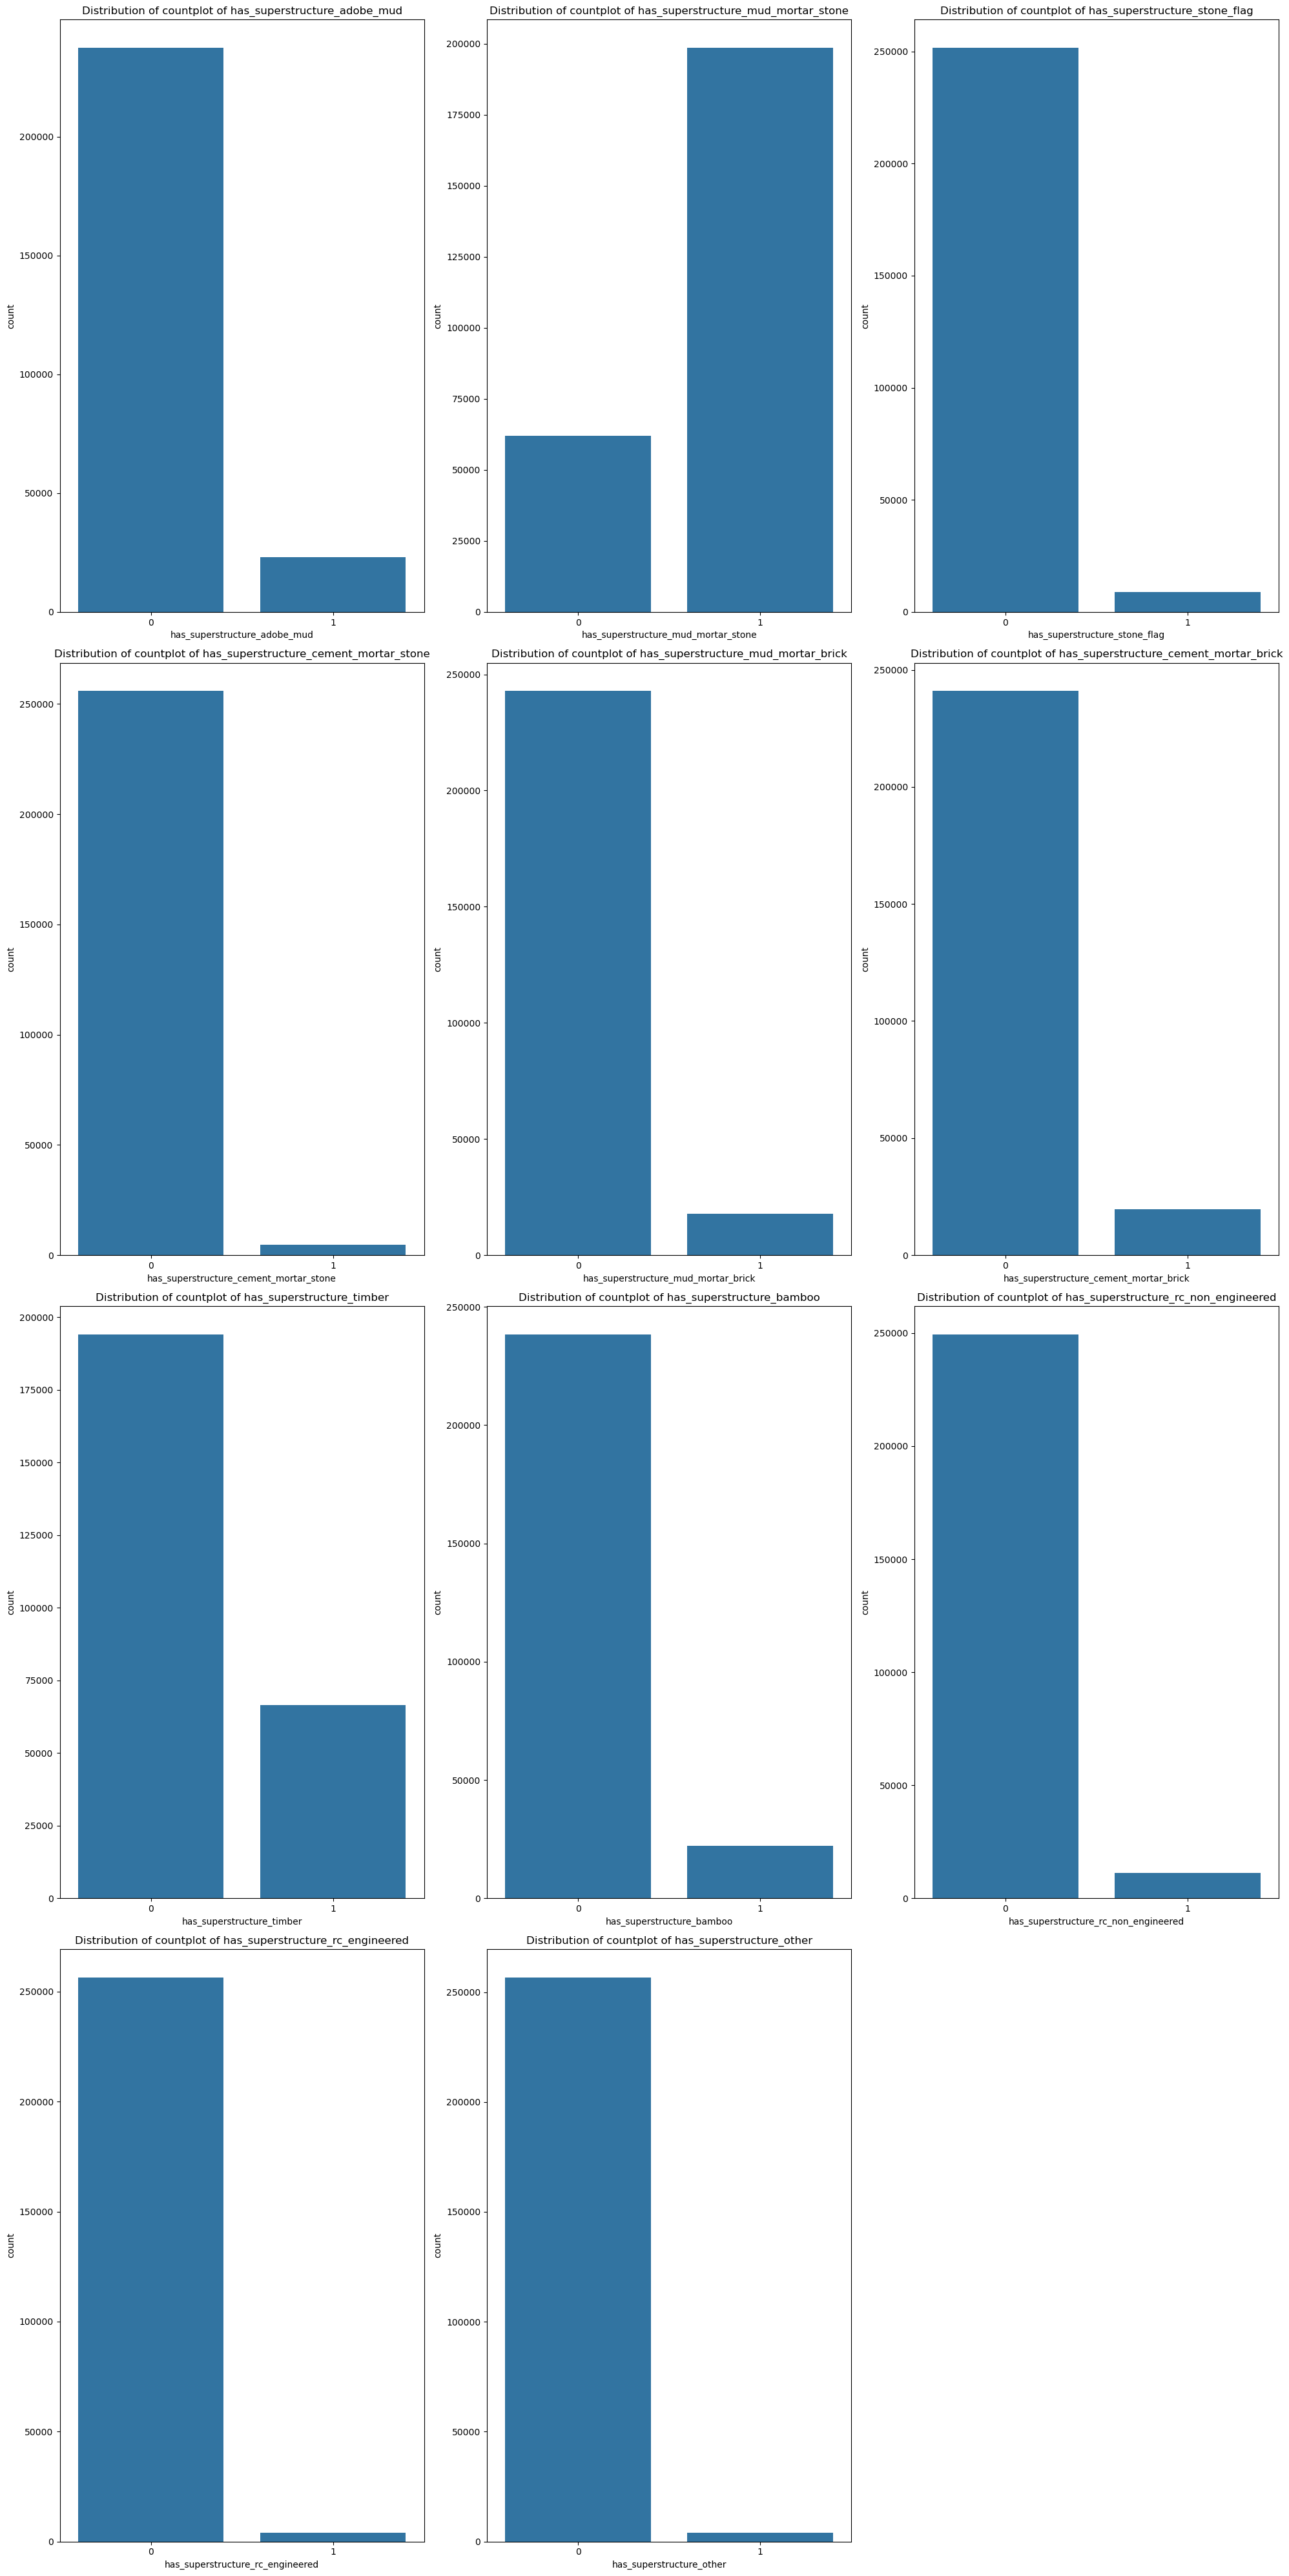

In [22]:
# plot countplot for some other features

features_superstructure = ['has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other']

plt.figure(figsize=(20,40))
for i, col in enumerate(features_superstructure, 1):
    plt.subplot(4,3,i)
    sns.countplot(data=df, x=col)
    plt.title(f"Distribution of countplot of {col}")
    plt.tight_layout()
plt.show()

## Distibution of Superstructure of Buildings:

* From above analysis, we can observe that superstructure made up of "mud mortar stone" buildings are more followe by superstructure made up of 'Timber', 'Bamboo','adobe_mud', 'mud_mortar_brick', 'cement_moratr_brick'. and least buildings superstructure made up of 'RCC Engineered' buildings exist.

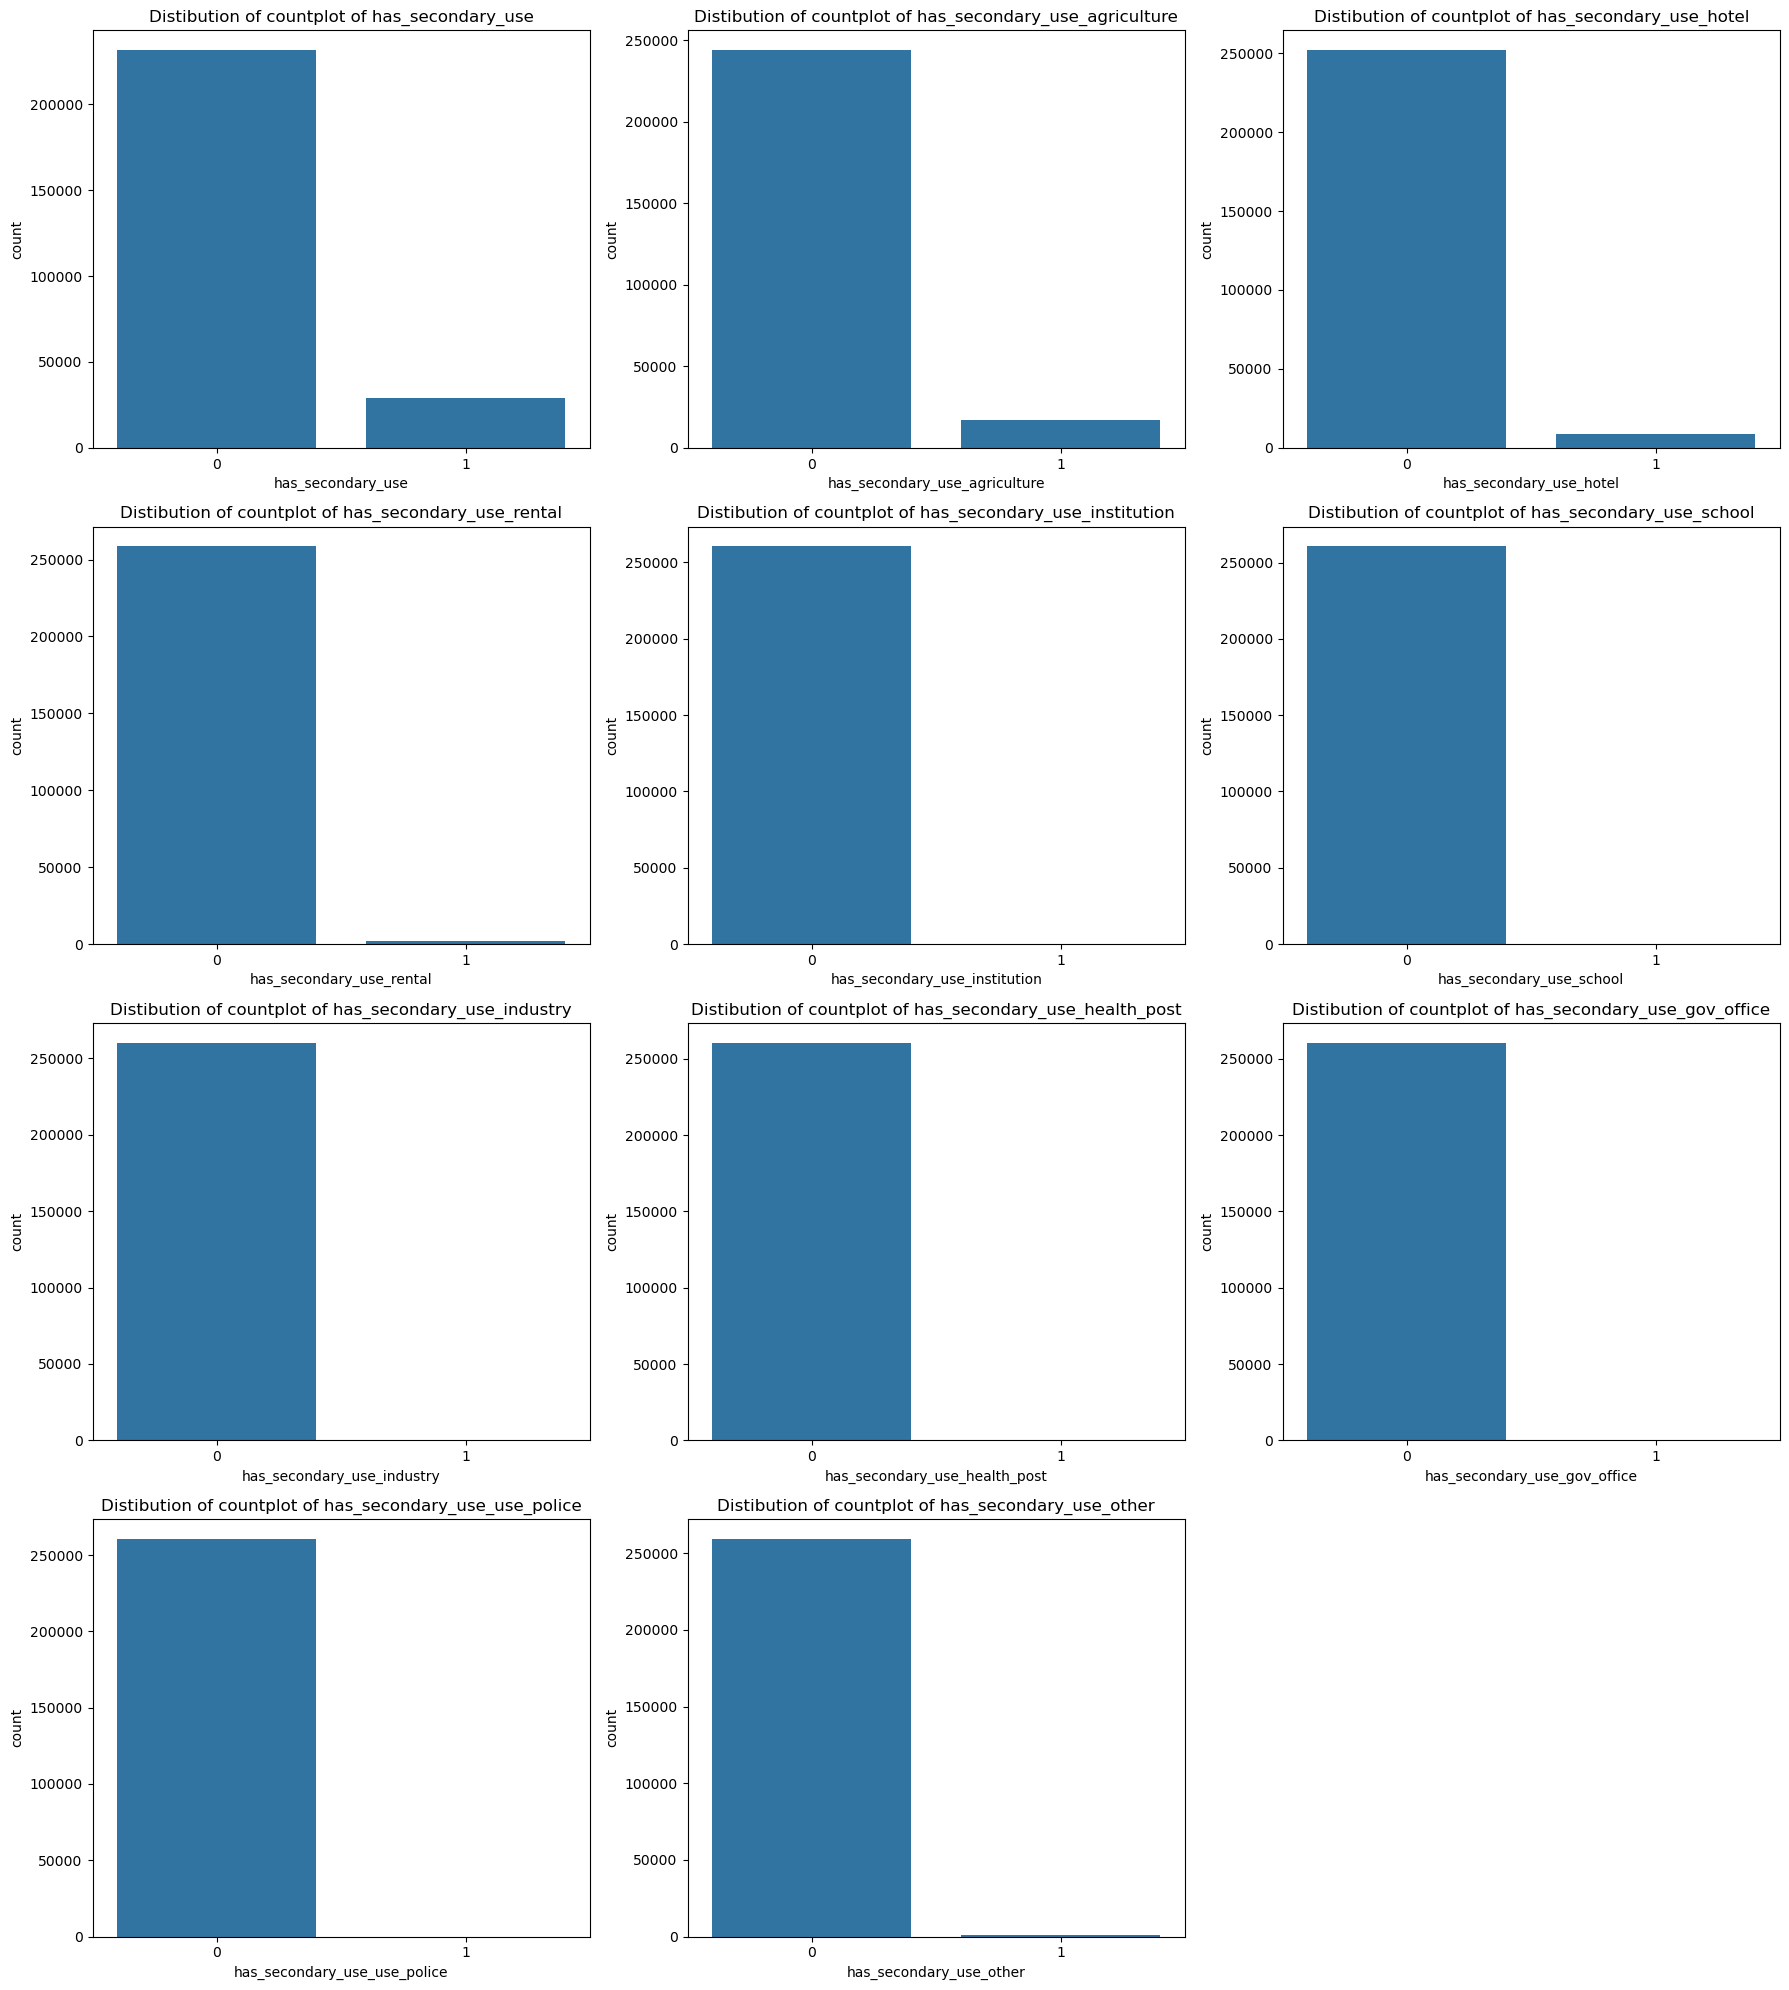

In [23]:
# plotting Graph of countplot for secondary use buildings

features_secondary_use = ['has_secondary_use',
       'has_secondary_use_agriculture', 'has_secondary_use_hotel',
       'has_secondary_use_rental', 'has_secondary_use_institution',
       'has_secondary_use_school', 'has_secondary_use_industry',
       'has_secondary_use_health_post', 'has_secondary_use_gov_office',
       'has_secondary_use_use_police', 'has_secondary_use_other']

plt.figure(figsize=(18,20))
for i, col in enumerate(features_secondary_use,1):
    plt.subplot(4,3,i)
    sns.countplot(data=df, x=col)
    plt.title(f"Distibution of countplot of {col}")
    plt.tight_layout()
plt.show()

## Distribution of Secondary Use Buildings
* From above analysis we can observe that, The Distribution of buildings which are secondary_use buildings symbolizes the buildings used for other purposes than home. It indicates Agricultural buildings, hotel buildings, School and Institutions are largely present whereas Govt buildings and Police station buildings are rarely present.

In [19]:
num_data = df.select_dtypes(include=['int64','float64'])

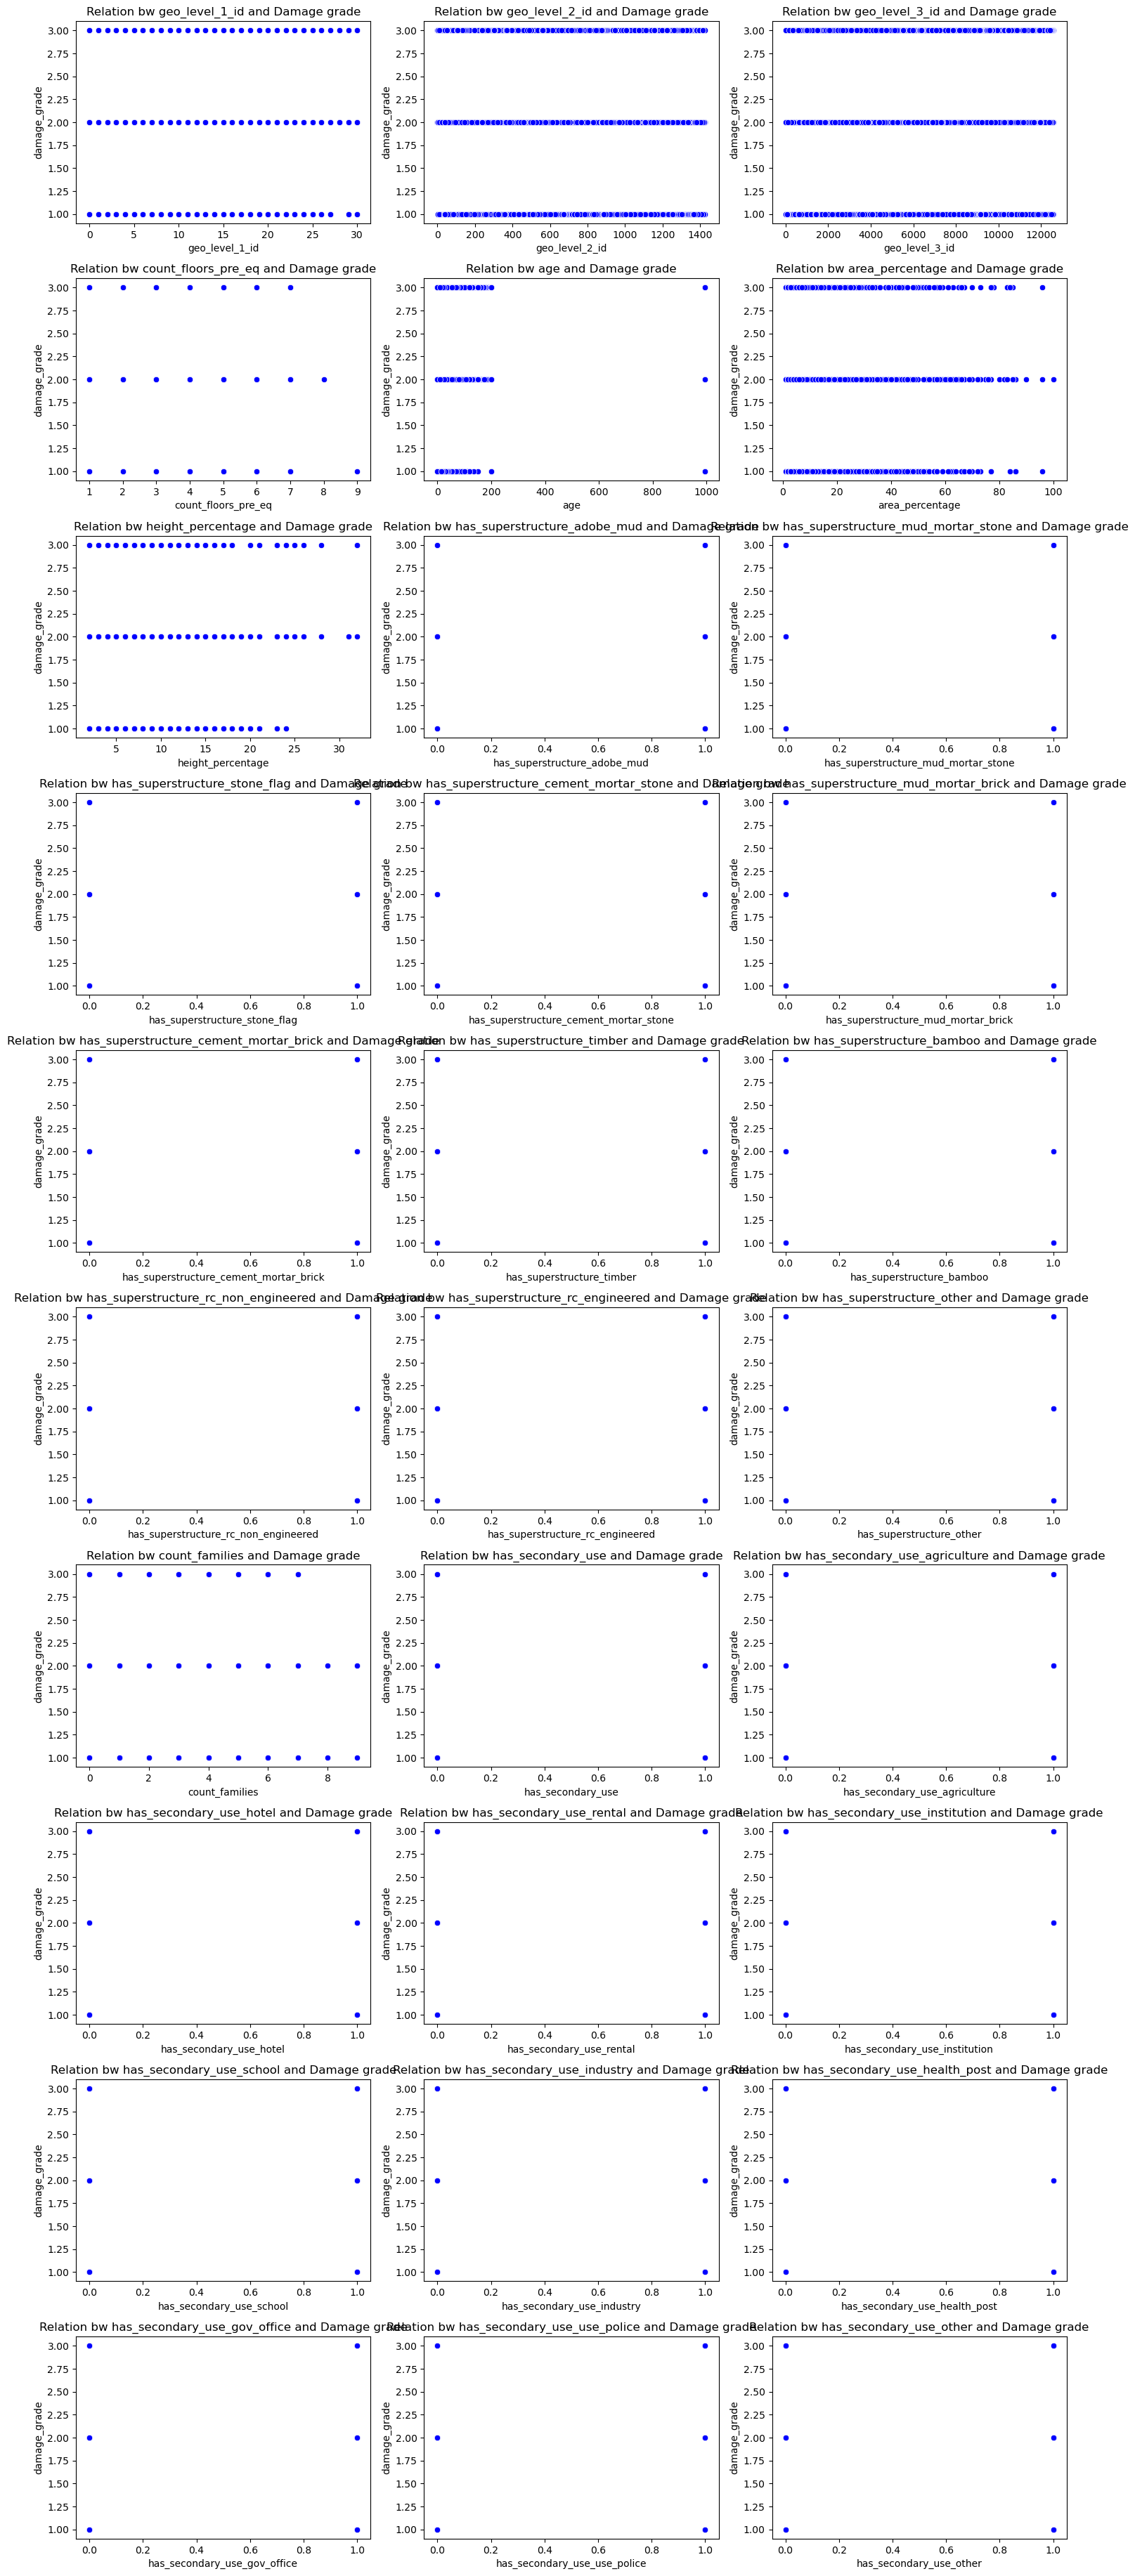

In [25]:
# plotting scatterplot for numerical features

features = num_data.drop(['building_id','damage_grade'], axis=1)

# plot scatterplot to compare with target
plt.figure(figsize=(15,40))
for i, col in enumerate(features,1):
    plt.subplot(11,3,i)
    sns.scatterplot(data=num_data, x=df[col], y=df.damage_grade, color='blue')
    plt.xlabel(col)
    plt.ylabel('damage_grade')
    plt.title(f"Relation bw {col} and Damage grade")
    plt.tight_layout()

plt.show()


## Distribution of scatterplot

* The features like geo level id 1, geo level id 2, geo level id 3, height percantage, area percantage, age of buildings and count of families columns are purely numerical discrete values these features contribute more with predicting target variable 'damage grade' and remaining columns are nominal (binary) values which are not collinear with target simply represents results with the binary values. so that we can carefully handle the outliers in numerical discrete values which reduce the complexity of model building.

*  Again, when we deeply look at plots geo-level-1 & geo-level-2 Id's the more number of buildings get destructed in sub region and sub-specific regions 

## Plotting Outlier Boxplot to identify outlier

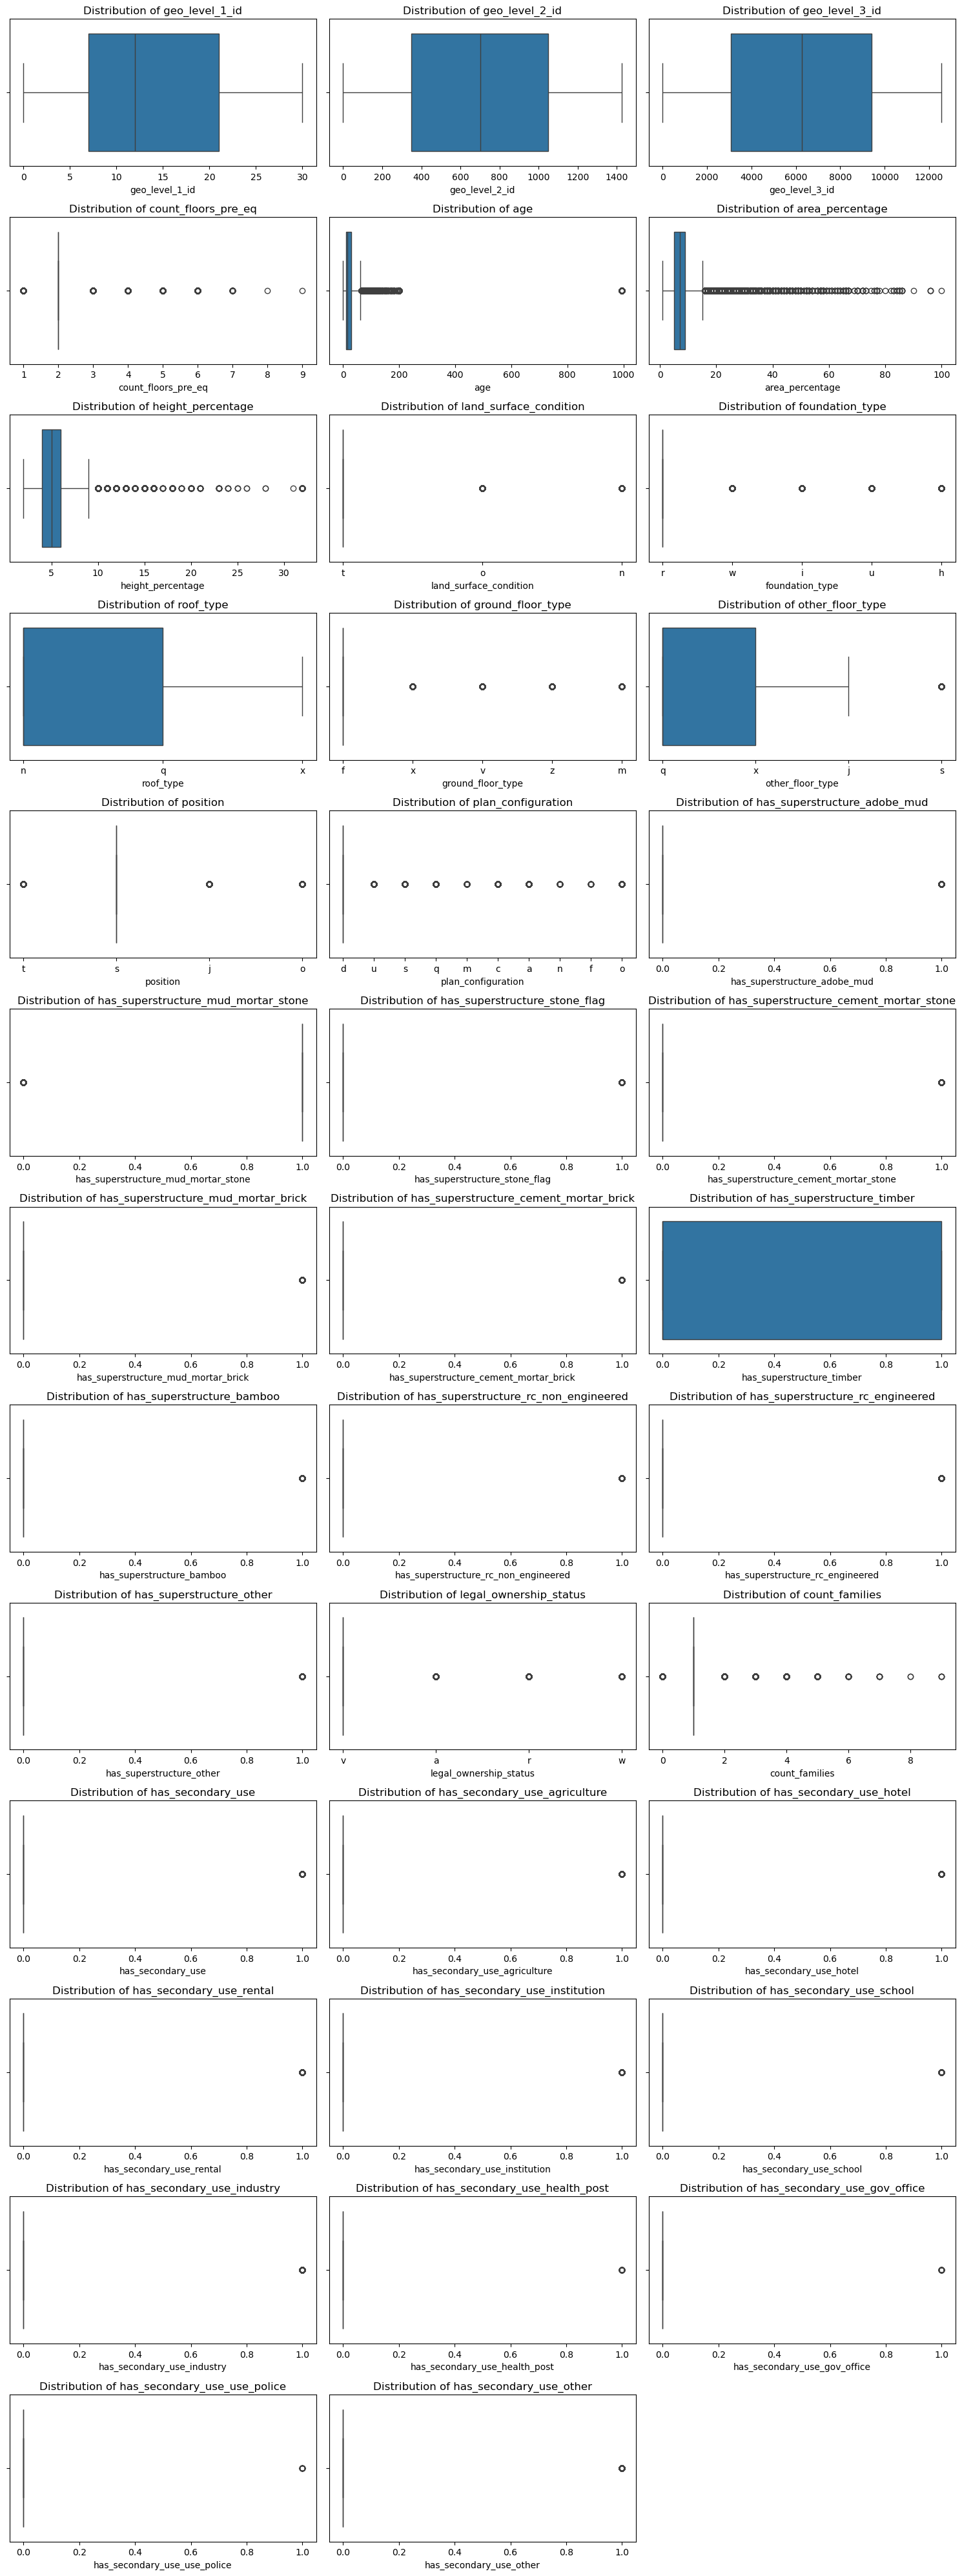

In [28]:
features = df.columns.drop(['damage_grade','building_id'])

# Plot histogram for all features
plt.figure(figsize=(15, 40))
for i, col in enumerate(features, 1):
    plt.subplot(13,3,i)
    sns.boxplot(x=df[col])
    plt.title(f"Distribution of {col}")
    plt.tight_layout()
plt.show()

# Handling Outliers
  There are 3 to 4 purely numerical columns influencing target are age, area_percentage, height_percentage, count_floors_pre_eq, count_families, we can handle outliers in this columns, others columns are binary in nature they cannot give extreme values other than 0 and 1.
 


In [9]:
import pandas as pd

def clean_earthquake_data(df):

    df_clean = df.copy()
    
    # Columns for IQR outlier removal
    iqr_cols = ['area_percentage', 'height_percentage']
    
    print(" Outlier Removal Report \n")
    
    # Before shape
    print(f"Before cleaning shape: {df_clean.shape}\n")

    for col in iqr_cols:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1

        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR

        # Mask
        mask = (df_clean[col] < lower) | (df_clean[col] > upper)
        outliers_count = mask.sum()
        outlier_percentage = (outliers_count / len(df_clean)) * 100

        print(f"Column: {col}")
        print(f"  Lower Bound: {lower}")
        print(f"  Upper Bound: {upper}")
        print(f"  Outliers Found: {outliers_count}")
        print(f"  Outlier %: {outlier_percentage:.2f}%")

        # Remove outliers
        df_clean = df_clean[(df_clean[col] >= lower) & (df_clean[col] <= upper)]

        print(f"  Shape after removing outliers in {col}: {df_clean.shape}\n")
    
    
    # Special rule for age column: keep only <= 200
    age_before = df_clean.shape[0]
    df_clean = df_clean[df_clean['age'] <= 200]
    age_after = df_clean.shape[0]

    removed_age = age_before - age_after
    percent_age = (removed_age / age_before) * 100

    print("Column: age (custom rule)")
    print("  Condition: age > 200 are removed")
    print(f"  Removed {removed_age} rows ({percent_age:.2f}%)")
    print(f"  Shape after age filtering: {df_clean.shape}\n")

    print("===== Cleaning Completed =====")

    return df_clean


In [10]:
df_cleaned = clean_earthquake_data(df)

 Outlier Removal Report 

Before cleaning shape: (260601, 40)

Column: area_percentage
  Lower Bound: -1.0
  Upper Bound: 15.0
  Outliers Found: 13557
  Outlier %: 5.20%
  Shape after removing outliers in area_percentage: (247044, 40)

Column: height_percentage
  Lower Bound: 1.0
  Upper Bound: 9.0
  Outliers Found: 6115
  Outlier %: 2.48%
  Shape after removing outliers in height_percentage: (240929, 40)

Column: age (custom rule)
  Condition: age > 200 are removed
  Removed 1270 rows (0.53%)
  Shape after age filtering: (239659, 40)

===== Cleaning Completed =====


In [11]:
# Check for skewness of columns
columns = ['age','height_percentage','area_percentage']

df_cleaned[columns].skew().to_frame("Skewness")


Skewness
age                2.024950
height_percentage  0.088330
area_percentage    0.607582

In [12]:
# skewness of numerical data
skewness = df_cleaned.skew(numeric_only=True,)

# sort values of skewness
skewness_sorted = skewness.sort_values(ascending=False)
skewness_sorted

has_secondary_use_use_police              106.815150
has_secondary_use_gov_office              104.358648
has_secondary_use_health_post              85.202611
has_secondary_use_school                   76.435690
has_secondary_use_institution              43.067917
has_secondary_use_industry                 32.960182
has_secondary_use_other                    13.943465
has_secondary_use_rental                   13.920198
has_superstructure_rc_engineered           11.470546
has_superstructure_other                    8.035140
has_superstructure_cement_mortar_stone      7.640283
has_secondary_use_hotel                     6.116640
has_superstructure_rc_non_engineered        5.366658
has_superstructure_stone_flag               5.087194
has_superstructure_mud_mortar_brick         3.842571
has_superstructure_cement_mortar_brick      3.717145
has_secondary_use_agriculture               3.475799
has_superstructure_adobe_mud                3.017267
has_superstructure_bamboo                   2.

Examples:

has_secondary_use_use_police

has_superstructure_rc_engineered

has_superstructure_bamboo

has_secondary_use_school

etc.

These columns show huge skewness (like 106, 85, 43…) because most buildings do NOT have that feature, so the column contains mostly 0’s and very few 1’s.

 Binary columns ALWAYS show extremely high skewness.
 DO NOT transform them.
 DO NOT consider their skewness as a problem.

 ML models (tree models like XGBoost, RF, LightGBM) handle binary columns perfectly.
 we should not apply log/sqrt/Yeo-Johnson to 0/1 features.

 So ignore skewness for ALL binary columns.

 No transformation needed.

In [13]:
# Handle Skewness only for purely numerical_columns are age, area_percentage, height_percentage
# skewness between -0.5 to 0.5 acceptable and -1 to +1 moderately acceptable, we can handle skewness above 1 or -1

from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='yeo-johnson')

df_cleaned['age_transformed'] = pt.fit_transform(df_cleaned[['age']])


In [14]:
df_cleaned.drop(['age', 'building_id'], axis=1, inplace=True)
df_cleaned.rename(columns={'age_transformed': 'age'}, inplace=True)


In [15]:
# Handleskewness for count families
import numpy as np
df_cleaned['count_families'] = np.cbrt(df_cleaned['count_families'])


## Cor-relational Heatmap

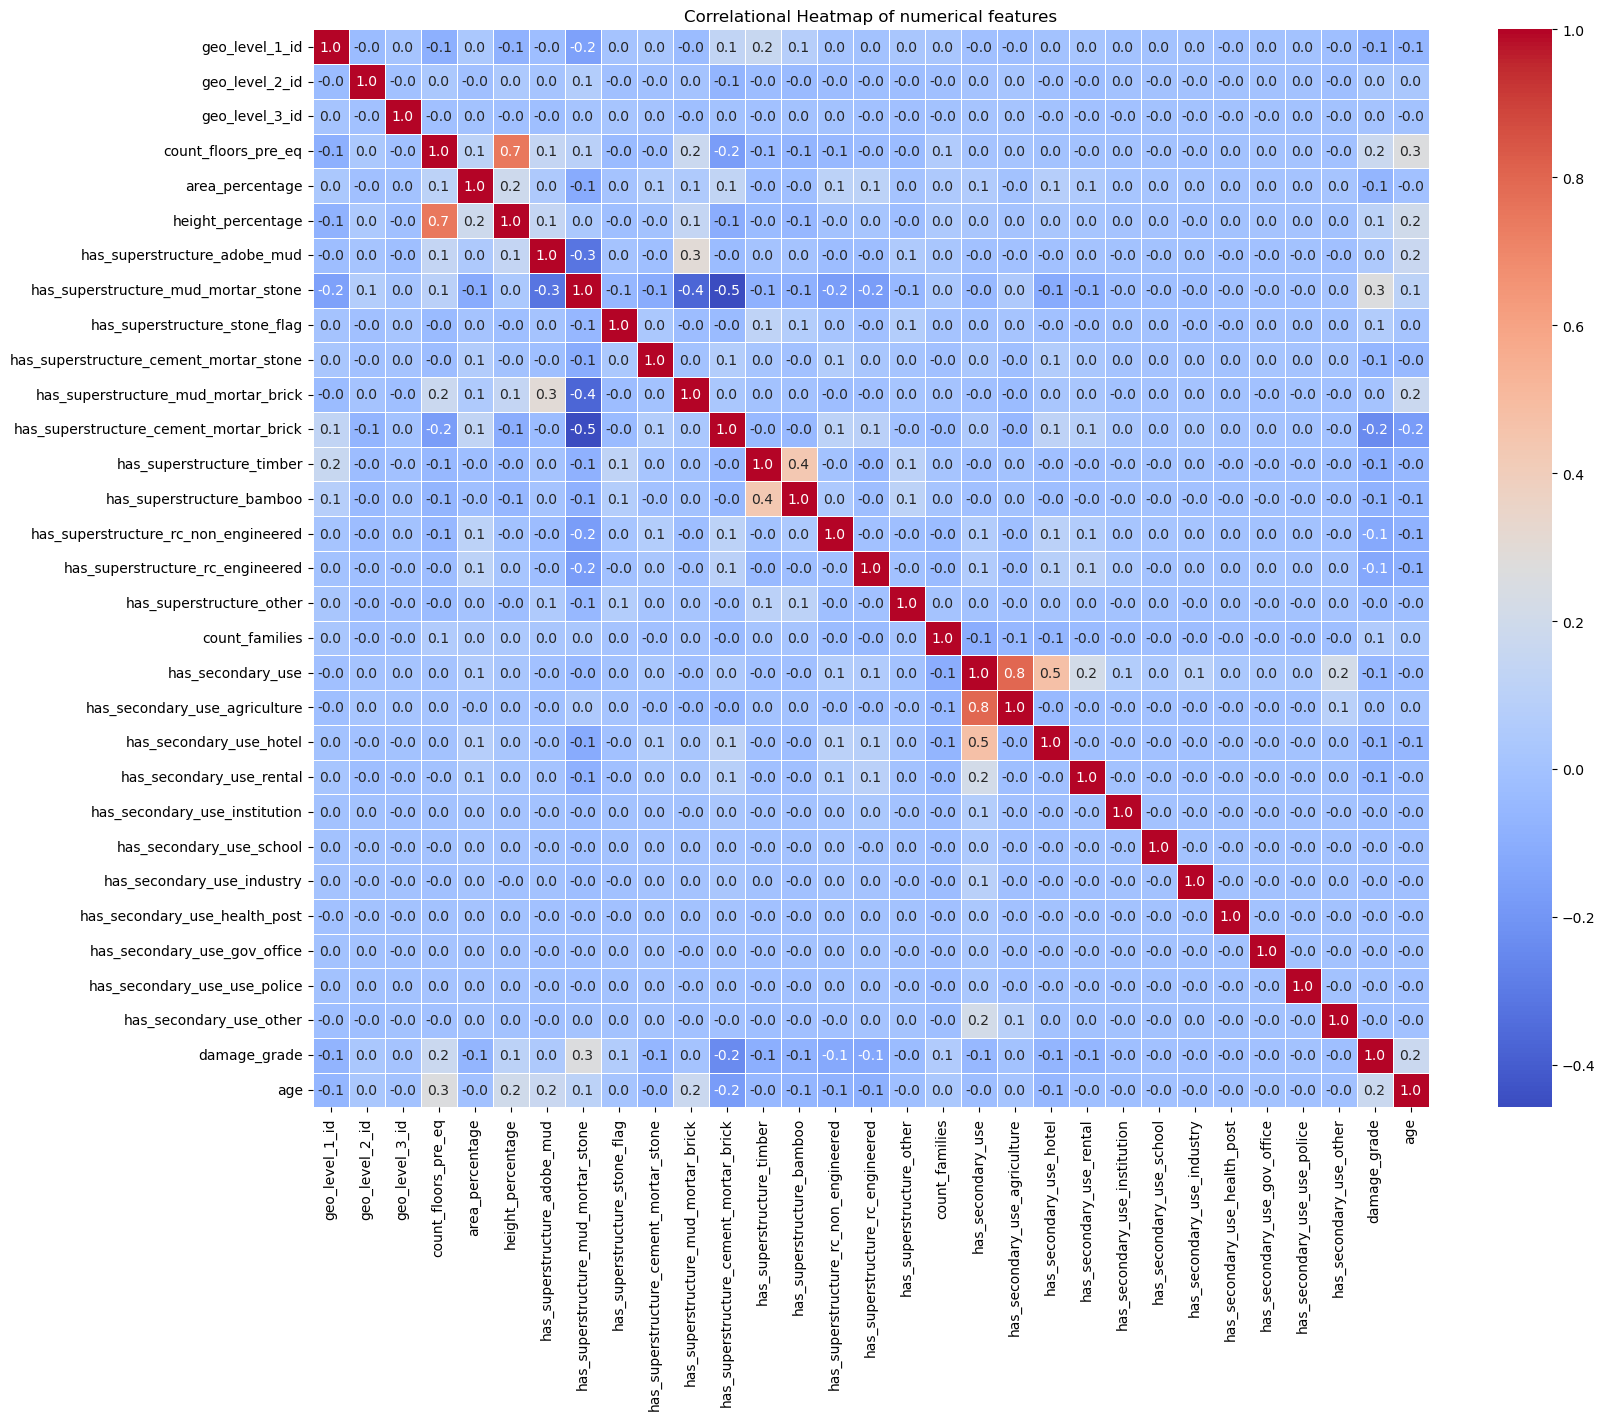

In [48]:
# plotting heatmap
plt.figure(figsize=(18,14))
sns.heatmap(df_cleaned.corr(numeric_only=True), cmap='coolwarm', 
            linewidth=0.5, annot=True, fmt=".1f")
plt.title("Correlational Heatmap of numerical features")
plt.show()

In [16]:

# Convert any string columns to numeric or drop them
df_cleaned_numeric = df_cleaned.select_dtypes(include=['number'])

# Calculate correlation with damage_grade and sort values

correlation_values = (df_cleaned_numeric.corr()['damage_grade'].drop('damage_grade')).sort_values(ascending=False)

# To display the correlation values,
correlation_values  

has_superstructure_mud_mortar_stone       0.263422
age                                       0.174114
count_floors_pre_eq                       0.170116
height_percentage                         0.111108
has_superstructure_stone_flag             0.061685
count_families                            0.057634
has_superstructure_adobe_mud              0.045242
geo_level_2_id                            0.030247
geo_level_3_id                            0.007521
has_superstructure_mud_mortar_brick       0.004504
has_secondary_use_agriculture             0.003576
has_secondary_use_use_police             -0.001051
has_secondary_use_health_post            -0.003259
has_secondary_use_gov_office             -0.004108
has_secondary_use_school                 -0.005608
has_secondary_use_industry               -0.010249
has_secondary_use_other                  -0.015651
has_secondary_use_institution            -0.018319
has_superstructure_other                 -0.036082
has_secondary_use              

Secondary use means the building is also used as:school,health post,police,rental,hotel,agriculture,industries,etc.

These do NOT affect:structural strength, material type,number of floors,height,foundation quality
So they do not directly influence earthquake resistance.
They only describe how the building is used, not how it is built.
Therefore, low real-world impact = safe to drop those secondary_use columns.

In [17]:
df_cleaned = df_cleaned.drop(columns=[
    'has_secondary_use_agriculture',
    'has_secondary_use_hotel',
    'has_secondary_use_rental',
    'has_secondary_use_institution',
    'has_secondary_use_school',
    'has_secondary_use_industry',
    'has_secondary_use_health_post',
    'has_secondary_use_gov_office',
    'has_secondary_use_use_police',
    'has_secondary_use_other'
])


In [18]:
df_cleaned.shape

(239659, 29)

## Convert categorical columns into scale of Label Encoding

In [19]:
# Label encoder
cat_cols = df_cleaned.select_dtypes(include="O").columns
print("Categorical Columns: ",list(cat_cols))

Categorical Columns:  ['land_surface_condition', 'foundation_type', 'roof_type', 'ground_floor_type', 'other_floor_type', 'position', 'plan_configuration', 'legal_ownership_status']


In [20]:
from sklearn.preprocessing import LabelEncoder

label_encoder ={}

for col in cat_cols:
    le = LabelEncoder()
    df_cleaned[col]=le.fit_transform(df_cleaned[col])
    label_encoder[col] = le # store encoder if it is needed to transform test data later

In [21]:
df_cleaned.head(10)

geo_level_1_id  geo_level_2_id  geo_level_3_id  count_floors_pre_eq  \
0               6             487           12198                    2   
1               8             900            2812                    2   
2              21             363            8973                    2   
3              22             418           10694                    2   
4              11             131            1488                    3   
5               8             558            6089                    2   
6               9             475           12066                    2   
7              20             323           12236                    2   
8               0             757            7219                    2   
9              26             886             994                    1   

   area_percentage  height_percentage  land_surface_condition  \
0                6                  5                       2   
1                8                  7                       1   
2                5                  5                       2   
3                6                  5                       2   
4                8                  9                       2   
5                9                  5                       2   
6                3                  4                       0   
7                8                  6                       2   
8                8                  6                       2   
9               13                  4                       2   

   foundation_type  roof_type  ground_floor_type  ...  \
0                2          0                  0  ...   
1                2          0                  3  ...   
2                2          0                  0  ...   
3                2          0                  0  ...   
4                2          0                  0  ...   
5                2          0                  0  ...   
6                2          0                  3  ...   
7                4          1                  2  ...   
8                2          1                  0  ...   
9                1          0                  2  ...   

   has_superstructure_timber  has_superstructure_bamboo  \
0                          0                          0   
1                          0                          0   
2                          0                          0   
3                          1                          1   
4                          0                          0   
5                          0                          0   
6                          0                          0   
7                          1                          0   
8                          1                          0   
9                          0                          0   

   has_superstructure_rc_non_engineered  has_superstructure_rc_engineered  \
0                                     0                                 0   
1                                     0                                 0   
2                                     0                                 0   
3                                     0                                 0   
4                                     0                                 0   
5                                     0                                 0   
6                                     0                                 0   
7                                     0                                 0   
8                                     0                                 0   
9                                     0                                 0   

   has_superstructure_other  legal_ownership_status  count_families  \
0                         0                       2             1.0   
1                         0                       2             1.0   
2                         0                       2             1.0   
3                         0                       2           

In [22]:
df1 = df_cleaned.copy()

In [23]:
# last once check for errors
df1.isnull().sum()

geo_level_1_id                            0
geo_level_2_id                            0
geo_level_3_id                            0
count_floors_pre_eq                       0
area_percentage                           0
height_percentage                         0
land_surface_condition                    0
foundation_type                           0
roof_type                                 0
ground_floor_type                         0
other_floor_type                          0
position                                  0
plan_configuration                        0
has_superstructure_adobe_mud              0
has_superstructure_mud_mortar_stone       0
has_superstructure_stone_flag             0
has_superstructure_cement_mortar_stone    0
has_superstructure_mud_mortar_brick       0
has_superstructure_cement_mortar_brick    0
has_superstructure_timber                 0
has_superstructure_bamboo                 0
has_superstructure_rc_non_engineered      0
has_superstructure_rc_engineered

## Training and Scaling Model

In [24]:
from sklearn.model_selection import train_test_split

# Drop target and seperate some features
x = df1.drop(['legal_ownership_status', 'damage_grade'], axis=1)
y = df1['damage_grade']

# Split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [25]:
# Scaling Data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

In [26]:
x_train_scaled.shape

(191727, 27)

In [27]:
x_test_scaled.shape

(47932, 27)

In [28]:
x_train.shape

(191727, 27)

In [29]:
x_test.shape

(47932, 27)

In [30]:
y_train.shape

(191727,)

In [31]:
y_test.shape

(47932,)

## Balancing  data

In [33]:
import warnings
warnings.filterwarnings('ignore')
from imblearn.over_sampling import SMOTE
from collections import Counter

# Apply SMOTE on scaled training data
smote = SMOTE(random_state=42)
x_train_smote, y_train_smote = smote.fit_resample(x_train_scaled, y_train)

# Check class balance before and after
print("Before SMOTE:", Counter(y_train))
print("After SMOTE: ", Counter(y_train_smote))

Before SMOTE: Counter({2: 109502, 3: 65850, 1: 16375})
After SMOTE:  Counter({2: 109502, 3: 109502, 1: 109502})


In [34]:
df1.to_csv("Earthquake_prediction_model",index=False)

# Building a Model
# Logistic Regression

In [46]:
# Train logistic Regression model
log_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=500)
log_reg.fit(x_train_smote, y_train_smote)

LogisticRegression(max_iter=500, multi_class='multinomial')

In [48]:
# Predict and evaluate a Model
# test prediction
y_pred_test = log_reg.predict(x_test_scaled)
# train prediction
y_pred_train = log_reg.predict(x_train_scaled)

In [49]:
confusion_matrix(y_test,y_pred_test)

array([[ 2678,   650,   765],
       [ 4880,  9209, 13287],
       [ 1318,  4155, 10990]], dtype=int64)

In [54]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
from sklearn.metrics import cohen_kappa_score

# Calculate scores properly by calling the functions
train_f1_score = f1_score(y_train, y_pred_train, average='macro')
test_f1_score = f1_score(y_test, y_pred_test, average='macro')

# Print the results correctly
print("Accuracy Score :", accuracy_score(y_test, y_pred_test))
print("Precision Score :", precision_score(y_test, y_pred_test, average='macro'))
print("Test F1 Score :", test_f1_score)  # average parameter already used when calculating test_f1_score
print("Train F1 Score :", train_f1_score)
print("Recall Score :", recall_score(y_test, y_pred_test, average='macro'))
print("Kappa Score:", cohen_kappa_score(y_test, y_pred_test))

Accuracy Score : 0.47728031377785196
Precision Score : 0.4659012598155415
Test F1 Score : 0.46251542390920625
Train F1 Score : 0.4644201987073658
Recall Score : 0.5527449666788353
Kappa Score: 0.18037889233385684


In [49]:
print(classification_report (y_test,y_pred_test))

              precision    recall  f1-score   support

           1       0.30      0.65      0.41      4093
           2       0.66      0.34      0.44     27376
           3       0.44      0.67      0.53     16463

    accuracy                           0.48     47932
   macro avg       0.47      0.55      0.46     47932
weighted avg       0.55      0.48      0.47     47932



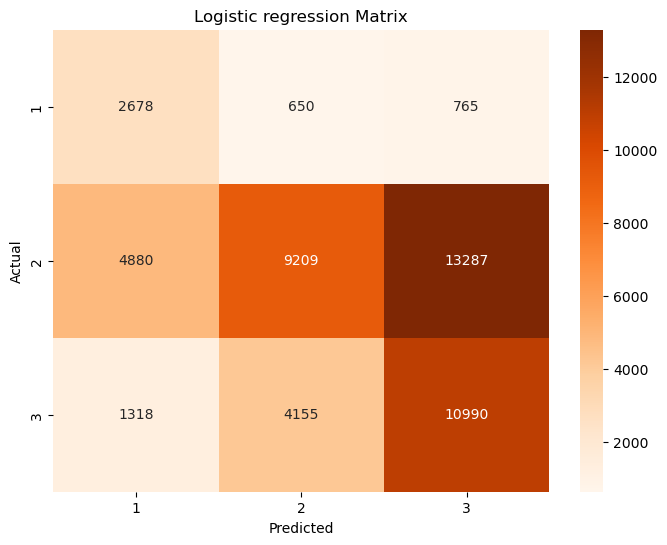

In [50]:
cm = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', xticklabels=sorted(y.unique()), yticklabels=sorted(y.unique()))
plt.title("Logistic regression Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## Super Vector Machine Model

In [51]:
from sklearn.svm import SVC

# SVM Classifier (with RBF kernel)
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', tol=1e-3, probability=False, max_iter=1000,random_state=42)
svm_model.fit(x_train_smote, y_train_smote)

SVC(max_iter=1000, random_state=42)

In [52]:
# prediction on Test data
y_pred_svm = svm_model.predict(x_test_scaled)

# prediction on Train data
y_pred_train_svm = svm_model.predict(x_train_scaled)

In [55]:
# Calculate Test and Train F1 Scores
train_f1_score = f1_score(y_train, y_pred_train_svm, average='macro')
test_f1_score = f1_score(y_test, y_pred_svm, average='macro')

# Print the results 
print("Accuracy Score :", accuracy_score(y_test, y_pred_svm))
print("Precision Score :", precision_score(y_test, y_pred_svm, average='macro'))
print("Test F1 Score :", test_f1_score)  # average parameter already used when calculating test_f1_score
print("Train F1 Score :", train_f1_score)
print("Recall Score :", recall_score(y_test, y_pred_svm, average='macro'))
print("Kappa Score:", cohen_kappa_score(y_test, y_pred_svm))

Accuracy Score : 0.1694483852123842
Precision Score : 0.3587342691453122
Test F1 Score : 0.17887079384692753
Train F1 Score : 0.1771999155322014
Recall Score : 0.33680667578739226
Kappa Score: 0.01209224126555386


In [66]:
print(classification_report(y_test, y_pred_svm))

confusion_matrix(y_test, y_pred_svm)

              precision    recall  f1-score   support

           1       0.08      0.75      0.15      4093
           2       0.57      0.07      0.13     27376
           3       0.43      0.19      0.26     16463

    accuracy                           0.17     47932
   macro avg       0.36      0.34      0.18     47932
weighted avg       0.48      0.17      0.17     47932



array([[ 3072,   765,   256],
       [21516,  1936,  3924],
       [12634,   715,  3114]], dtype=int64)

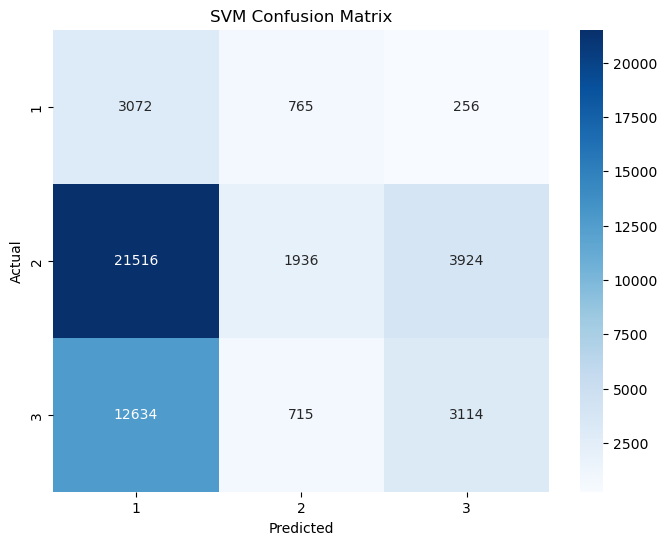

In [57]:
cm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=sorted(y.unique()), yticklabels=sorted(y.unique()))
plt.title("SVM Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


## K Nearest Neighbors Classifier (KNN)

In [59]:
from sklearn.neighbors import KNeighborsClassifier

In [63]:
Knn_model = KNeighborsClassifier(n_neighbors = 5,weights='uniform', 
                                 algorithm='auto', leaf_size=30, p=2, 
                                 metric='minkowski', metric_params=None, n_jobs=-1)

Knn_model.fit(x_train_smote, y_train_smote)

KNeighborsClassifier(n_jobs=-1)

In [67]:
# Test prediction
y_pred_knn = Knn_model.predict(x_test_scaled)
# Train prediction
y_pred_train_knn = Knn_model.predict(x_train_scaled)

In [68]:
# Calculate Test and Train F1 Scores
train_f1_score = f1_score(y_train, y_pred_train_knn, average='macro')
test_f1_score = f1_score(y_test, y_pred_knn, average='macro')

# Print the results 
print("Accuracy Score :", accuracy_score(y_test, y_pred_knn))
print("Precision Score :", precision_score(y_test, y_pred_knn, average='macro'))
print("Test F1 Score :", test_f1_score)  # average parameter already used when calculating test_f1_score
print("Train F1 Score :", train_f1_score)
print("Recall Score :", recall_score(y_test, y_pred_knn, average='macro'))
print("Kappa Score:", cohen_kappa_score(y_test, y_pred_knn))

Accuracy Score : 0.5656346490862054
Precision Score : 0.5173994158025745
Test F1 Score : 0.531889165945093
Train F1 Score : 0.7109057213658332
Recall Score : 0.6032630964526549
Kappa Score: 0.2871842085943087


In [69]:
print("\nClassification Report :\n", classification_report(y_test, y_pred_knn))
print("\nConfusion Matrix :\n", confusion_matrix(y_test, y_pred_knn))


Classification Report :
               precision    recall  f1-score   support

           1       0.31      0.67      0.42      4093
           2       0.70      0.52      0.60     27376
           3       0.54      0.62      0.58     16463

    accuracy                           0.57     47932
   macro avg       0.52      0.60      0.53     47932
weighted avg       0.61      0.57      0.57     47932


Confusion Matrix :
 [[ 2754   976   363]
 [ 4935 14150  8291]
 [ 1282  4973 10208]]


Confusion Matrix

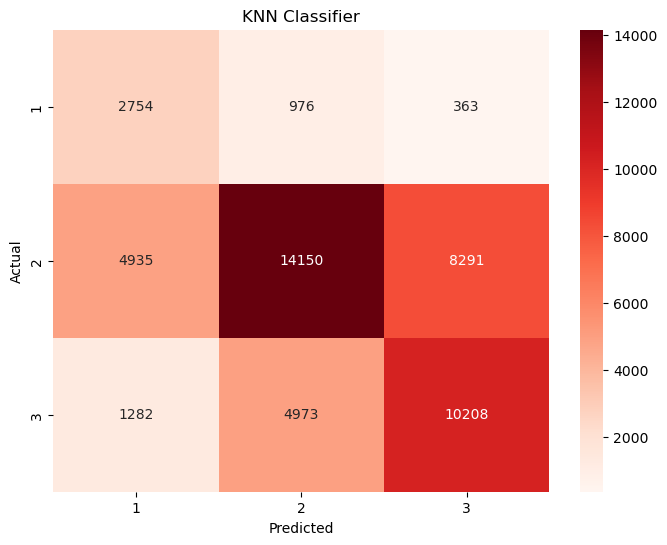

In [72]:
cm = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=sorted(y.unique()), yticklabels=sorted(y.unique()))
plt.title("KNN Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


## Tree Based Algorithms

In [35]:
from imblearn.over_sampling import SMOTE

#Ensure Y_train is 1D
y_train = y_train.ravel()

#Apply smote
sm = SMOTE(random_state=42)
x_train_balanced, y_train_balanced = sm.fit_resample(x_train, y_train)

# Check new class distribution
print("Balanced class Distribution :\n", pd.Series(y_train_balanced).value_counts())



Balanced class Distribution :
 2    109502
3    109502
1    109502
Name: count, dtype: int64


## Decision Tree algorithm

In [76]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [78]:
model_dt = DecisionTreeClassifier(random_state=42,
                                  class_weight='balanced',
                                  criterion='gini',
                                  splitter='best',
                                  ccp_alpha=0.0,
                                  max_depth=None)
model_dt.fit(x_train_balanced, y_train_balanced)


DecisionTreeClassifier(class_weight='balanced', random_state=42)

In [85]:
# prediction for test data
y_pred_dt = model_dt.predict(x_test)
# prediction for train data
y_pred_train_dt = model_dt.predict(x_train)

In [87]:
train_f1_score = f1_score(y_train, y_pred_train_dt, average='macro')
test_f1_score = f1_score(y_test, y_pred_dt, average='macro')

print('Accuracy:',accuracy_score(y_test,y_pred_dt))
print('precision_score:',precision_score(y_test, y_pred_dt, average='macro'))
print('Train f1_score',train_f1_score)
print('Test f1_score',test_f1_score)
print('recall_score:',recall_score(y_test,y_pred_dt, average='macro'))
print("Kappa Score:", cohen_kappa_score(y_test, y_pred_dt))

Accuracy: 0.6364015688892598
precision_score: 0.5697169120624821
Train f1_score 0.9830283667387136
Test f1_score 0.5758603875710574
recall_score: 0.5830667365147045
Kappa Score: 0.34533275342979963


In [88]:
print("\n Classification Report:\n", classification_report(y_test, y_pred_dt))
print("\n Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))



 Classification Report:
               precision    recall  f1-score   support

           1       0.41      0.46      0.44      4093
           2       0.70      0.68      0.69     27376
           3       0.59      0.61      0.60     16463

    accuracy                           0.64     47932
   macro avg       0.57      0.58      0.58     47932
weighted avg       0.64      0.64      0.64     47932


 Confusion Matrix:
 [[ 1885  1888   320]
 [ 2267 18573  6536]
 [  412  6005 10046]]


## Confusion Matrix Visual

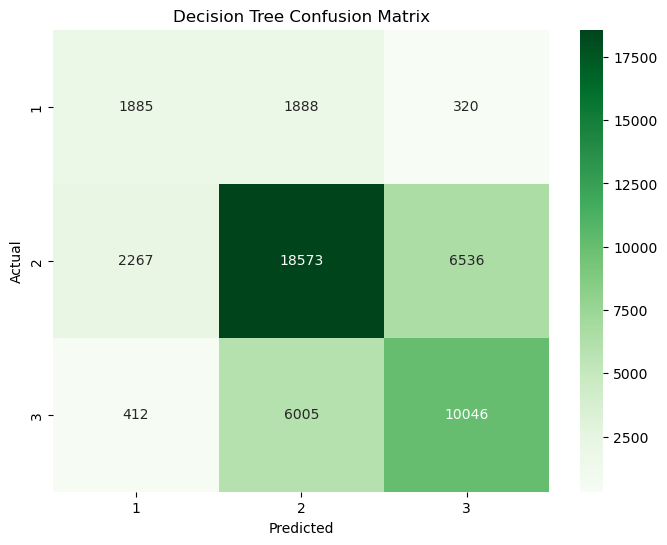

In [97]:
cm = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=sorted(y.unique()), yticklabels=sorted(y.unique()))
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


## RandomForest Classifier Algorithm

In [90]:
from sklearn.ensemble import RandomForestClassifier

In [101]:
rf_model = RandomForestClassifier(
    n_estimators=400,
    max_depth=25,          # limit depth
    min_samples_split=20,  # avoid splitting too deep
    min_samples_leaf=5,    # smooth out noise
    max_features='sqrt',   # reduces correlation between trees
    class_weight='balanced', # helps with class imbalance
    random_state=42,
    n_jobs=-1
)

rf_model.fit(x_train_balanced, y_train_balanced)


RandomForestClassifier(class_weight='balanced', max_depth=25,
                       min_samples_leaf=5, min_samples_split=20,
                       n_estimators=400, n_jobs=-1, random_state=42)

In [102]:
# prediction for test data
y_pred_rf = rf_model.predict(x_test)
# prediction for train data
y_pred_train_rf = rf_model.predict(x_train)

In [103]:
train_f1_score = f1_score(y_train, y_pred_train_rf, average='macro')
test_f1_score = f1_score(y_test, y_pred_rf, average='macro')

print('Accuracy:',accuracy_score(y_test,y_pred_rf))
print('precision_score:',precision_score(y_test, y_pred_rf, average='macro'))
print('Train f1_score',train_f1_score)
print('Test f1_score',test_f1_score)
print('recall_score:',recall_score(y_test,y_pred_rf, average='macro'))
print("Kappa Score:", cohen_kappa_score(y_test, y_pred_rf))

Accuracy: 0.7007635817407994
precision_score: 0.6451412624268938
Train f1_score 0.7332293224845151
Test f1_score 0.6528603409188283
recall_score: 0.6629379450681074
Kappa Score: 0.45748496541987316


In [105]:
print("\n Classification Report:\n", classification_report(y_test, y_pred_rf))
print("\n Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


 Classification Report:
               precision    recall  f1-score   support

           1       0.51      0.59      0.55      4093
           2       0.74      0.75      0.75     27376
           3       0.68      0.65      0.67     16463

    accuracy                           0.70     47932
   macro avg       0.65      0.66      0.65     47932
weighted avg       0.70      0.70      0.70     47932


 Confusion Matrix:
 [[ 2416  1581    96]
 [ 2086 20442  4848]
 [  260  5472 10731]]


## Confusion Matrix Visual

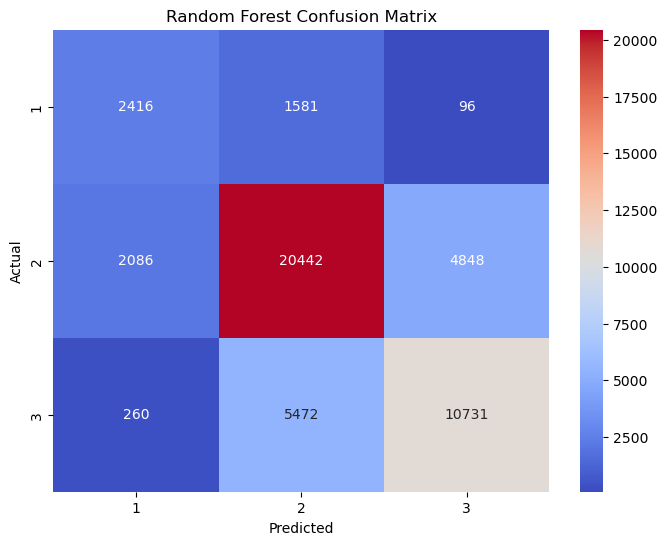

In [106]:
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm',
            xticklabels=sorted(y.unique()), yticklabels=sorted(y.unique()))
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


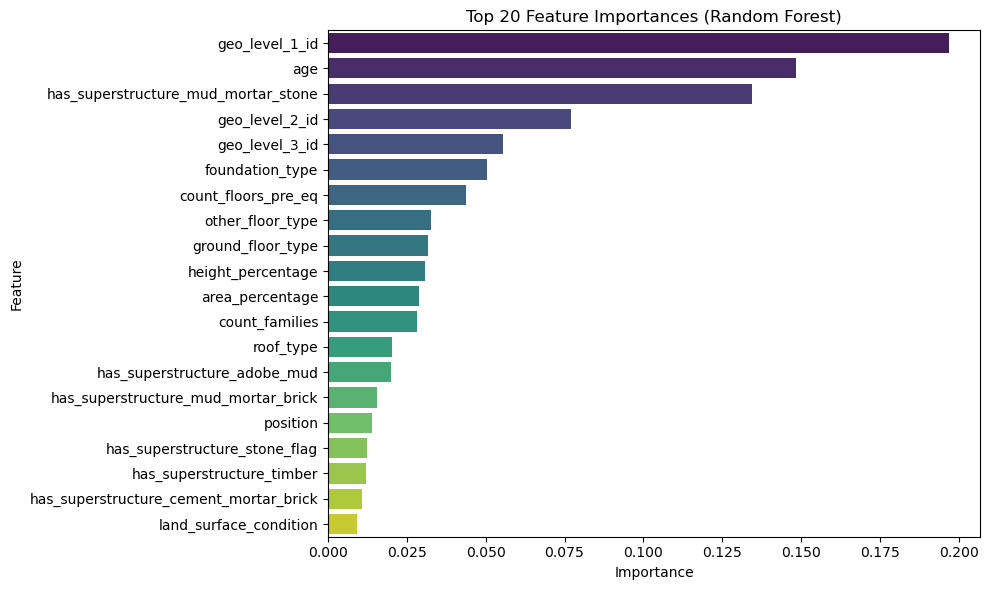

In [107]:
import numpy as np

importances = rf_model.feature_importances_
feat_names = x.columns
feat_imp_df = pd.DataFrame({'Feature': feat_names, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df.head(20), palette='viridis')
plt.title("Top 20 Feature Importances (Random Forest)")
plt.tight_layout()
plt.show()


## XG Boost

In [109]:
from xgboost import XGBClassifier, plot_importance

In [36]:
# Encode labels to start from 0 if needed
le = LabelEncoder()
df1['damage_grade_encoded'] = le.fit_transform(df1['damage_grade'])

X = df1.drop(['damage_grade','damage_grade_encoded'], axis=1)
y = df1['damage_grade_encoded']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify = y, random_state=42)


In [38]:
sm = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = sm.fit_resample(X_train, y_train)

print("Balanced class distribution:\n", pd.Series(y_train_balanced).value_counts())


Balanced class distribution:
 damage_grade_encoded
1    109502
2    109502
0    109502
Name: count, dtype: int64


In [131]:
# Tree models and XGBoost handles categorical dummies and dense features well.No scaling needed.
model_XG = XGBClassifier(
    objective='multi:softprob',
    num_class=len(np.unique(y)),
    n_estimators=1000,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.7,
    reg_alpha=0.5,
    reg_lambda=1.0,
    tree_method='hist',   # faster for medium->large data; use 'gpu_hist' if you have GPU
    random_state=42,
    n_jobs=-1,
    eval_metric='mlogloss'
)

# Early stopping with a validation set
eval_set = [(X_train_balanced, y_train_balanced), (X_test, y_test)]
model_XG.fit(
    X_train_balanced, y_train_balanced,
    eval_set=eval_set,
    early_stopping_rounds=50,
    verbose=50
)

# Test Prediction
y_pred_XG = model_XG.predict(X_test)

# Train prediction
y_pred_train_XG = model_XG.predict(X_train)

[0]	validation_0-mlogloss:1.07775	validation_1-mlogloss:1.08629
[50]	validation_0-mlogloss:0.68518	validation_1-mlogloss:0.80146
[100]	validation_0-mlogloss:0.60622	validation_1-mlogloss:0.73948
[150]	validation_0-mlogloss:0.57028	validation_1-mlogloss:0.71309
[200]	validation_0-mlogloss:0.54610	validation_1-mlogloss:0.69663
[250]	validation_0-mlogloss:0.52863	validation_1-mlogloss:0.68491
[300]	validation_0-mlogloss:0.51413	validation_1-mlogloss:0.67518
[350]	validation_0-mlogloss:0.50226	validation_1-mlogloss:0.66718
[400]	validation_0-mlogloss:0.49128	validation_1-mlogloss:0.66001
[450]	validation_0-mlogloss:0.48244	validation_1-mlogloss:0.65460
[500]	validation_0-mlogloss:0.47403	validation_1-mlogloss:0.64918
[550]	validation_0-mlogloss:0.46709	validation_1-mlogloss:0.64490
[600]	validation_0-mlogloss:0.46022	validation_1-mlogloss:0.64059
[650]	validation_0-mlogloss:0.45413	validation_1-mlogloss:0.63671
[700]	validation_0-mlogloss:0.44817	validation_1-mlogloss:0.63309
[750]	validat

In [132]:
train_f1_score = f1_score(y_train, y_pred_train_XG, average='macro')
test_f1_score = f1_score(y_test, y_pred_XG, average='macro')

print('Accuracy:',accuracy_score(y_test,y_pred_XG))
print('precision_score:',precision_score(y_test, y_pred_XG, average='macro'))
print('Train f1_score',train_f1_score)
print('Test f1_score',test_f1_score)
print('recall_score:',recall_score(y_test,y_pred_XG, average='macro'))
print("Kappa Score:", cohen_kappa_score(y_test, y_pred_XG))

Accuracy: 0.7266335642159726
precision_score: 0.6840050462935472
Train f1_score 0.7092414274976133
Test f1_score 0.6729516042506654
recall_score: 0.664426854455438
Kappa Score: 0.4914407460686161


In [133]:
print("\n Classification Report:\n", classification_report(y_test, y_pred_XG))
print("\n Confusion Matrix:\n", confusion_matrix(y_test, y_pred_XG))


 Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.54      0.56      4093
           1       0.75      0.80      0.77     27376
           2       0.72      0.65      0.68     16463

    accuracy                           0.73     47932
   macro avg       0.68      0.66      0.67     47932
weighted avg       0.72      0.73      0.72     47932


 Confusion Matrix:
 [[ 2230  1799    64]
 [ 1437 21958  3981]
 [  173  5649 10641]]


## Confusion Matrix Visual

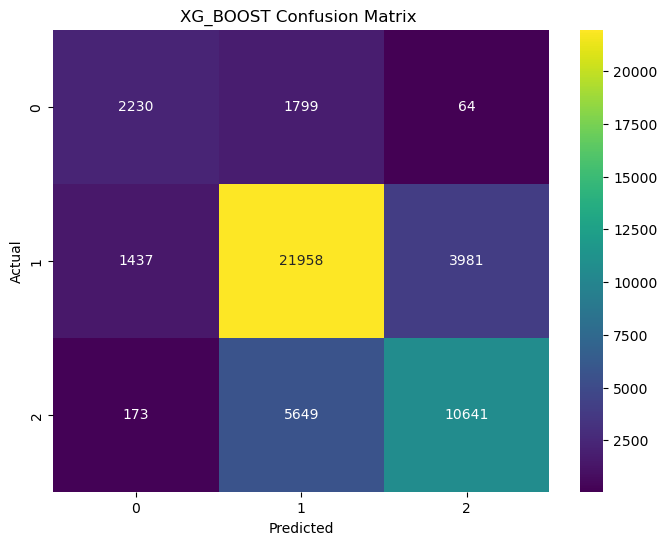

In [135]:
cm = confusion_matrix(y_test, y_pred_XG)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis',
            xticklabels=sorted(y.unique()), yticklabels=sorted(y.unique()))
plt.title("XG_BOOST Confusion Matrix ")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


## Model performance on Top 20 features


In [143]:
importances = model_XG.feature_importances_
# Make sure we don't request more features than available
num_features = min(20, len(importances))
top_features = np.argsort(importances)[::-1][:num_features]  # consider top features (max 15)

# Get feature names from the training data columns

top_features = [idx for idx in top_features if idx < len(x_train_balanced.columns)]
top_feature_names = x_train_balanced.columns[top_features]

X_train_top = x_train_balanced[top_feature_names]  # Note: using lowercase x to match variable name
X_test_top = X_test[top_feature_names]

final_model = model_XG
final_model.fit(X_train_top, y_train_balanced, eval_set=[(X_train_top, y_train_balanced), (X_test_top, y_test)],
    early_stopping_rounds=50,
    verbose=50)

y_pred = final_model.predict(X_test_top)

[0]	validation_0-mlogloss:1.08393	validation_1-mlogloss:1.08977
[50]	validation_0-mlogloss:0.77225	validation_1-mlogloss:0.86285
[100]	validation_0-mlogloss:0.71488	validation_1-mlogloss:0.81886
[150]	validation_0-mlogloss:0.68884	validation_1-mlogloss:0.79743
[200]	validation_0-mlogloss:0.67178	validation_1-mlogloss:0.78322
[250]	validation_0-mlogloss:0.65654	validation_1-mlogloss:0.77072
[300]	validation_0-mlogloss:0.64368	validation_1-mlogloss:0.76072
[350]	validation_0-mlogloss:0.63135	validation_1-mlogloss:0.75119
[400]	validation_0-mlogloss:0.62114	validation_1-mlogloss:0.74366
[450]	validation_0-mlogloss:0.61206	validation_1-mlogloss:0.73730
[500]	validation_0-mlogloss:0.60308	validation_1-mlogloss:0.73097
[550]	validation_0-mlogloss:0.59524	validation_1-mlogloss:0.72565
[600]	validation_0-mlogloss:0.58797	validation_1-mlogloss:0.72082
[650]	validation_0-mlogloss:0.58163	validation_1-mlogloss:0.71688
[700]	validation_0-mlogloss:0.57568	validation_1-mlogloss:0.71327
[750]	validat

In [144]:
test_f1_score = f1_score(y_test, y_pred, average='macro')

print('Accuracy:',accuracy_score(y_test,y_pred))
print('precision_score:',precision_score(y_test, y_pred, average='macro'))
print('Test f1_score',test_f1_score)
print('recall_score:',recall_score(y_test,y_pred_XG, average='macro'))
print("Kappa Score:", cohen_kappa_score(y_test, y_pred_XG))

Accuracy: 0.681820078444463
precision_score: 0.6170020567541158
Test f1_score 0.6395033726267849
recall_score: 0.664426854455438
Kappa Score: 0.4914407460686161


In [145]:
print("\n Classification Report:\n", classification_report(y_test, y_pred))
print("\n Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


 Classification Report:
               precision    recall  f1-score   support

           0       0.41      0.70      0.52      4093
           1       0.77      0.67      0.71     27376
           2       0.67      0.70      0.69     16463

    accuracy                           0.68     47932
   macro avg       0.62      0.69      0.64     47932
weighted avg       0.71      0.68      0.69     47932


 Confusion Matrix:
 [[ 2882  1091   120]
 [ 3601 18236  5539]
 [  565  4335 11563]]


## Feature Importance plot for XG Boost

<Figure size 1000x600 with 0 Axes>

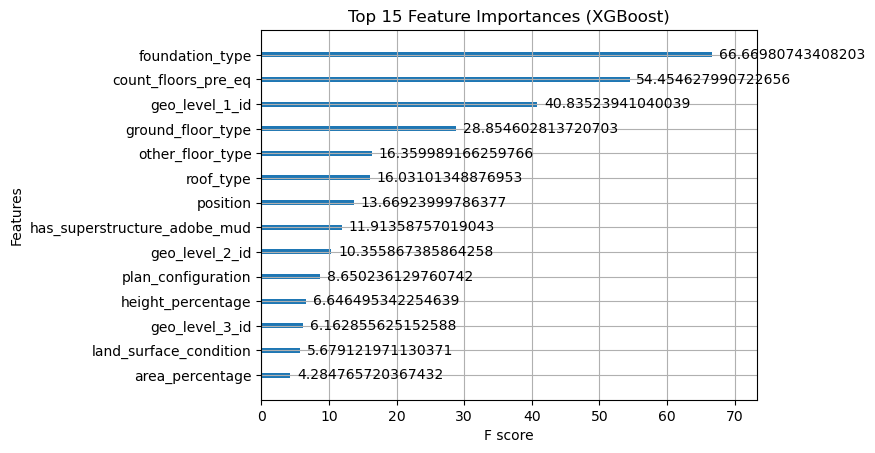

In [207]:
plt.figure(figsize=(10, 6))
plot_importance(model_XG, max_num_features=15, importance_type='gain')
plt.title("Top 15 Feature Importances (XGBoost)")
plt.show()


## Hyperparameter tuning with randomized search CV

In [151]:
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from xgboost import XGBClassifier
import numpy as np

# Base model (use same settings you used)
xgb = XGBClassifier(
    objective='multi:softprob',
    num_class=len(np.unique(y_train)),
    tree_method='hist',    
    use_label_encoder=False,
    eval_metric='mlogloss',
    n_jobs=-1,
    random_state=42
)

param_dist = {
    'n_estimators': [100, 300, 500],
    'learning_rate': [0.01, 0.02, 0.05, 0.1],
    'max_depth': [3, 4, 5, 6, 8, 10],
    'min_child_weight': [1, 3, 5, 7],
    'gamma': [0, 0.1, 0.2,],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [ 0.6, 0.7, 0.8],
    'reg_alpha': [0, 0.5, 1.0],
    'reg_lambda': [0.5, 1.0, 1.5, 2.0]
}

cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=60,                # number of random combinations to try
    scoring='f1_macro',
    n_jobs=-1,
    cv=cv,
    verbose=2,
    random_state=42
)

search.fit(
    X_train, y_train,
    eval_set = [(X_test, y_test)],
    early_stopping_rounds=70,
    verbose=False
)

print("Best params:", search.best_params_)
print("Best f1_macro (cv):", search.best_score_)

# Refit best model on full train and evaluate on test
best = search.best_estimator_
y_pred_test = best.predict(X_test)
from sklearn.metrics import f1_score, accuracy_score, cohen_kappa_score, classification_report
print("Test f1_macro:", f1_score(y_test, y_pred_test, average='macro'))
print("Test accuracy:", accuracy_score(y_test, y_pred_test))
print("Kappa:", cohen_kappa_score(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test))


Fitting 3 folds for each of 60 candidates, totalling 180 fits
Best params: {'subsample': 0.7, 'reg_lambda': 1.0, 'reg_alpha': 0.5, 'n_estimators': 500, 'min_child_weight': 7, 'max_depth': 10, 'learning_rate': 0.1, 'gamma': 0.1, 'colsample_bytree': 0.7}
Best f1_macro (cv): 0.6771720689953247
Test f1_macro: 0.681419094820852
Test accuracy: 0.7458691479596095
Kappa: 0.5142972364787595
              precision    recall  f1-score   support

           0       0.68      0.47      0.56      4093
           1       0.75      0.85      0.80     27376
           2       0.76      0.64      0.69     16463

    accuracy                           0.75     47932
   macro avg       0.73      0.65      0.68     47932
weighted avg       0.74      0.75      0.74     47932



Saving a model

In [152]:
import joblib
joblib.dump(model, 'XGB_tuned_Earthquake.pkl')

['XGB_tuned_Earthquake.pkl']

In [153]:
model.save_model('xgb_earthquake.json')

## Confusion Matrix Visual (Tuned XG Boost)

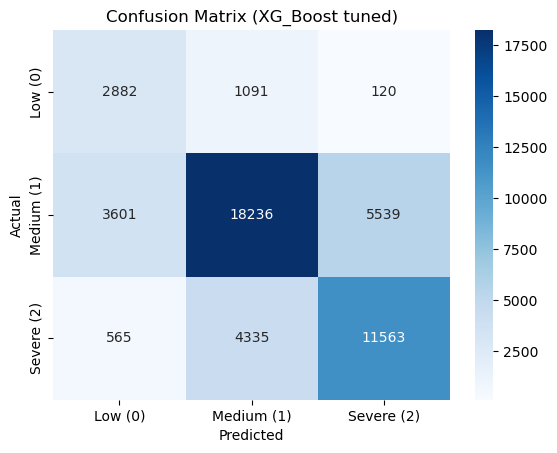

In [171]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Low (0)', 'Medium (1)', 'Severe (2)'],
            yticklabels=['Low (0)', 'Medium (1)', 'Severe (2)'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (XG_Boost tuned)')
plt.show()

## Light GradientBoosting Model (LGBM) 

In [181]:
!pip install lightgbm
import lightgbm  as lgbm


## Training a model

In [186]:
# Intializing Parameters
base_params = {
    'objective': 'multiclass',
    'num_class': len(np.unique(y_train)),
    'boosting_type': 'gbdt',   # fast, stable on CPU
    'metric': 'multi_logloss',
    'n_jobs': -1,
    'verbosity': -1,
    'seed': 42
}

lgbm_model =lgbm.LGBMClassifier(
    **base_params,
    n_estimators=1000,
    learning_rate=0.05,
    num_leaves=31,
    max_depth=8,
    subsample=0.8,
    colsample_bytree=0.7,
    reg_alpha=0.1,
    reg_lambda=1.0,
    min_child_samples=20,
    importance_type='gain'
)
    
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.15, stratify=y_train, random_state=42)

lgbm_model.fit(
    X_train_balanced, y_train_balanced,
    eval_set=[(X_test, y_test)],
    eval_metric='multi_logloss',
)

y_pred_test = lgbm_model.predict(X_test)
y_pred_train_lgbm = lgbm_model.predict(X_train)

In [194]:
test_f1_score = f1_score(y_test, y_pred_test, average='macro')
train_f1_score = f1_score(y_train, y_pred_train_lgbm, average = 'macro')

print('Accuracy:',accuracy_score(y_test,y_pred_test))
print('precision_score (macro):',precision_score(y_test, y_pred_test, average='macro'))
print('Train f1_score (macro):', train_f1_score)
print('Test f1_score (macro):',test_f1_score)
print('recall_score(macro):',recall_score(y_test,y_pred_test, average='macro'))
print("Kappa Score:", cohen_kappa_score(y_test, y_pred_test))
print("\n Classification Report:\n", classification_report(y_test, y_pred_test))
print("\nConfusion matrix :\n",confusion_matrix(y_test, y_pred_test))

Accuracy: 0.7517268712490092
precision_score (macro): 0.719668359766243
Train f1_score (macro): 0.7054521866208586
Test f1_score (macro): 0.7068776074338308
recall_score(macro): 0.6972990758990415
Kappa Score: 0.5372993436250867

 Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.60      0.62      1509
           1       0.76      0.83      0.79     10087
           2       0.76      0.66      0.71      6066

    accuracy                           0.75     17662
   macro avg       0.72      0.70      0.71     17662
weighted avg       0.75      0.75      0.75     17662


Confusion matrix :
 [[ 907  582   20]
 [ 462 8345 1280]
 [  51 1990 4025]]


## Confusion matrix Visual (LGB)

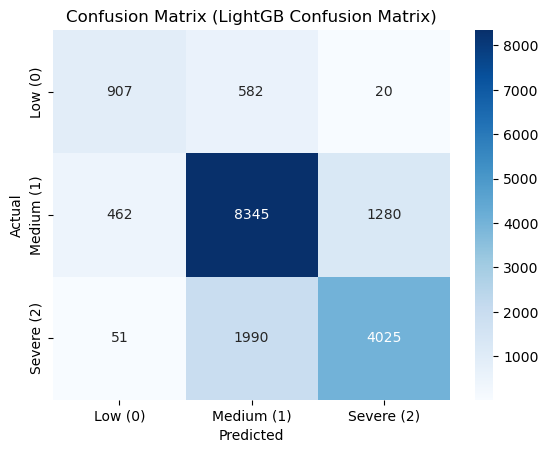

In [191]:
cm = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Low (0)', 'Medium (1)', 'Severe (2)'],
            yticklabels=['Low (0)', 'Medium (1)', 'Severe (2)'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (LightGB Confusion Matrix)')
plt.show()


In [214]:
import joblib
joblib.dump(best, "lgb_earthquake.pkl")
print("Model saved!")


Model saved!


In [215]:
best.save_model("lightgbm_earthquake_model_new.txt")


## Feature Engineering (To improve Scores)

* Age-based Features

Older buildings are more vulnerable, but age relationship is non-linear

In [40]:
# Age Bucketization
df_cleaned['age_bucket'] = pd.cut(df_cleaned['age'],
                          bins=[0,20,40,60,80,100,200],
                          labels=False,
                          include_lowest=True)


In [41]:
# log of age stabilizes effect
import numpy as np
df_cleaned['log_age'] = np.log1p(df_cleaned['age'])


* Floors × Height Interaction Features

Earthquake damage strongly depends on structural height and number of floors.

In [42]:
# Floor to height-ratio
df_cleaned['floors_height_ratio'] = df_cleaned['height_percentage'] / (df_cleaned['count_floors_pre_eq'] + 1)


In [43]:
# Floor*Height product(more mass with height more destruction)
df_cleaned['floors_height_product'] = df_cleaned['height_percentage'] * df_cleaned['count_floors_pre_eq']


* Family Density Features

More families per area = more occupancy load → higher risk

In [44]:
# Density
df_cleaned['family_density'] = df_cleaned['count_families'] / (df_cleaned['area_percentage'] + 1)


In [45]:
# Families per floor
df_cleaned['families_per_floor'] = df_cleaned['count_families'] / (df_cleaned['count_floors_pre_eq'] + 1)


* Soil/Geographical Features, encode as categoriacal

In [46]:
df_cleaned['geo_level_1_id'] = df_cleaned['geo_level_1_id'].astype('category')
df_cleaned['geo_level_2_id'] = df_cleaned['geo_level_2_id'].astype('category')
df_cleaned['geo_level_3_id'] = df_cleaned['geo_level_3_id'].astype('category')


In [58]:
df_cleaned = df_cleaned.drop(columns=['age_bucket'])

In [59]:
# encode the values to start from '0' in target columns because Boosting algorithms considers from zero
le = LabelEncoder()
df_cleaned['damage_grade_encoded'] = le.fit_transform(df_cleaned['damage_grade'])

X = df_cleaned.drop(['damage_grade','damage_grade_encoded'], axis=1)
y = df_cleaned['damage_grade_encoded']

In [60]:
X.shape

(239659, 32)

In [61]:
y.shape

(239659,)

In [62]:
df_cleaned.isnull().sum()

geo_level_1_id                            0
geo_level_2_id                            0
geo_level_3_id                            0
count_floors_pre_eq                       0
area_percentage                           0
height_percentage                         0
land_surface_condition                    0
foundation_type                           0
roof_type                                 0
ground_floor_type                         0
other_floor_type                          0
position                                  0
plan_configuration                        0
has_superstructure_adobe_mud              0
has_superstructure_mud_mortar_stone       0
has_superstructure_stone_flag             0
has_superstructure_cement_mortar_stone    0
has_superstructure_mud_mortar_brick       0
has_superstructure_cement_mortar_brick    0
has_superstructure_timber                 0
has_superstructure_bamboo                 0
has_superstructure_rc_non_engineered      0
has_superstructure_rc_engineered

## Train, Test, Split

In [63]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify = y, random_state=42)


## Balancing data

In [81]:
sm = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = sm.fit_resample(X_train, y_train)

print("Balanced class distribution:\n", pd.Series(y_train_balanced).value_counts())


Balanced class distribution:
 damage_grade_encoded
1    109502
2    109502
0    109502
Name: count, dtype: int64


## Hyper Parameter tuning for light Gradient Boosting

In [85]:
# RandomizedSearchCV hyperparameter tuning for LightGBM 

from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV
import lightgbm as lgb
import time

RANDOM_STATE = 42
N_ITER = 45        
CV_FOLDS = 3



# Base estimator with moderate n_estimators (will be overridden by param grid if provided)
base = lgb.LGBMClassifier(
    objective='multiclass',
    num_class=len(np.unique(y_train)),
    boosting_type='gbdt',
    n_estimators=800,
    importance_type='gain',
    random_state=RANDOM_STATE,
    n_jobs=-1,
    verbose=-1
)

# Parameter distribution for RandomizedSearchCV
param_dist = {
    'n_estimators': [200, 400, 600, 800,],
    'learning_rate': [0.01, 0.03, 0.05, 0.08],
    'num_leaves': [24, 31, 40, 56, 70],
    'max_depth': [6, 8, 10, 12, -1],
    'min_child_samples': [5, 10, 20, 30,40],
    'subsample': [0.6, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.5, 0.6, 0.7, 0.8],
    'reg_alpha': [0.01, 0.1, 0.5, 1.0],
    'reg_lambda': [0.5, 1.0, 1.5, 2.0]
}

cv = StratifiedKFold(n_splits=CV_FOLDS, shuffle=True, random_state=RANDOM_STATE)

search = RandomizedSearchCV(
    estimator=base,
    param_distributions=param_dist,
    n_iter=N_ITER,
    scoring='f1_macro',
    n_jobs=-1,
    cv=cv,
    verbose=2,
    random_state=RANDOM_STATE,
    return_train_score=False
)

# Fit RandomizedSearchCV using the holdout as eval_set for early stopping to speed each fit
fit_params = {
    "eval_set": [(X_test, y_test)],
    "eval_metric": "multi_logloss",
    "callbacks" : [
        lgb.early_stopping(50),
        lgb.log_evaluation(-1)
    ]
    
}

start = time.time()
search.fit(X_train_balanced, y_train_balanced, **fit_params)
end = time.time()
print(f"RandomizedSearchCV finished in {(end-start)/60:.2f} minutes")

print("Best CV f1_macro :", search.best_score_)
print("Best params:", search.best_params_)

# Refit best model on FULL training data with early stopping (use a validation split) 
best_params = search.best_params_.copy()

# Build final estimator with best params
final = lgb.LGBMClassifier(
    objective='multiclass',
    num_class=len(np.unique(y_train)),
    boosting_type='gbdt',
    random_state=RANDOM_STATE,
    n_jobs=-1,
    importance_type='gain',
    **best_params
)

final.set_params(n_estimators=2000)  # allow many trees, early stopping will cut
final.fit(
    X_train_balanced, y_train_balanced,
    eval_set=[(X_test, y_test)],
    eval_metric="multi_logloss",
    callbacks = [lgb.early_stopping(50),lgb.log_evaluation(-1)]
)



#  Evaluate on test set 
y_pred_test = final.predict(X_test)
y_pred_train = final.predict(X_train)


Fitting 3 folds for each of 45 candidates, totalling 135 fits
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[379]	valid_0's multi_logloss: 0.563183
RandomizedSearchCV finished in 83.24 minutes
Best CV f1_macro : 0.8364937625942339
Best params: {'subsample': 1.0, 'reg_lambda': 1.5, 'reg_alpha': 1.0, 'num_leaves': 70, 'n_estimators': 600, 'min_child_samples': 5, 'max_depth': 8, 'learning_rate': 0.08, 'colsample_bytree': 0.5}
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[379]	valid_0's multi_logloss: 0.563183


Final Test accuracy : 0.7483518317616623
Final Test f1_macro: 0.6977367943324461
Final Train f1_macro: 0.7666846138326306
Final Kappa Score: 0.5310861865088836

Classification Report (test):

              precision    recall  f1-score   support

           0       0.62      0.57      0.59      4093
           1       0.76      0.82      0.79     27376
           2       0.75      0.66      0.71     16463

    accuracy                           0.75     47932
   macro avg       0.71      0.69      0.70     47932
weighted avg       0.75      0.75      0.75     47932


Confusion matrix :
 [[ 2353  1661    79]
 [ 1291 22573  3512]
 [  181  5338 10944]]


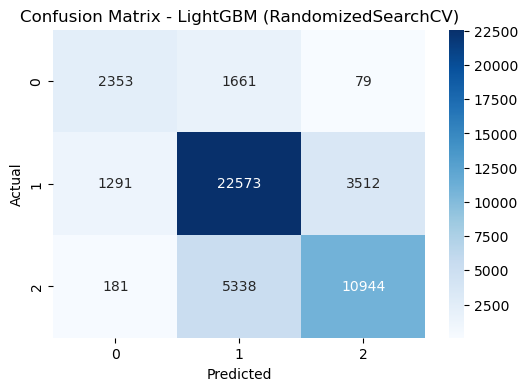

In [86]:
from sklearn.metrics import cohen_kappa_score

# Print final scores
print("Final Test accuracy :", accuracy_score(y_test, y_pred_test))
print("Final Test f1_macro:", f1_score(y_test, y_pred_test, average='macro'))
print("Final Train f1_macro:", f1_score(y_train, y_pred_train, average='macro'))
print("Final Kappa Score:", cohen_kappa_score(y_test, y_pred_test))
print("\nClassification Report (test):\n")

print(classification_report(y_test, y_pred_test))
print("\nConfusion matrix :\n", confusion_matrix(y_test, y_pred_test))
# Confusion matrix

cm = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - LightGBM (RandomizedSearchCV)')
plt.show()

## Best Cv f1(macro) score = 83% 
*  Even afer hyperparameter tuning scores should improve but in my model score is almost same reduced by 0.03% because this dataset and model requires high computational power and GPU's, i restricted model for less early stopping rounds and number of iterations  because my cpu and processor can't handle such burden. definitely for Hyperparameter tuning for LGBM Test F1 score definitely shoots up 2-3% extra so that model goty best cv f1 macro score.

In [79]:
import joblib
joblib.dump(final, "lgbm_randomized_best_model.pkl")
print("Saved final model to lgbm_randomized_best_model.pkl")

Saved final model to lgbm_randomized_best_model.pkl


In [3]:
# Model performance dictionary
model_results = {
    "Model": [
        "Logistic Regression", 
        "Super Vector Machine Model", 
        "KNN Classifier",
        "Decision Tree Classifier",
        "Random Forest Classifier",
        "XG Boost classifier (Before tuning)",
        "XG Boost Classifier (After tuning)",
        "Light Boost Classifier(Before tuning)",
        "Light Boost Classifier (After tuning"
    ],
    
    "Accuracy": [
        0.477,
        0.169,
        0.565,
        0.634,
        0.70,
        0.72,
        0.74,
        0.75,
        0.750
    ],

    "Train F1 score" : [
        0.464,
        0.177,
        0.710,
        0.983,
        0.733,
        0.70,
        0.701,
        0.705,
        0.741
    ],

    "Test F1 score" : [
        0.462,
        0.178,
        0.53,
        0.575,
        0.652,
        0.672,
        0.68,
        0.706,
        0.697
    ],

    "kappa score" : [
        0.18,
        0.012,
        0.287,
        0.345,
        0.457,
        0.491,
        0.514,
        0.53,
        0.52
    ]
}

# Convert to DataFrame
df_results = pd.DataFrame(model_results)

# Display the table
print(df_results)
    

                                   Model  Accuracy  Train F1 score  \
0                    Logistic Regression     0.477           0.464   
1             Super Vector Machine Model     0.169           0.177   
2                         KNN Classifier     0.565           0.710   
3               Decision Tree Classifier     0.634           0.983   
4               Random Forest Classifier     0.700           0.733   
5    XG Boost classifier (Before tuning)     0.720           0.700   
6     XG Boost Classifier (After tuning)     0.740           0.701   
7  Light Boost Classifier(Before tuning)     0.750           0.705   
8   Light Boost Classifier (After tuning     0.750           0.741   

   Test F1 score  kappa score  
0          0.462        0.180  
1          0.178        0.012  
2          0.530        0.287  
3          0.575        0.345  
4          0.652        0.457  
5          0.672        0.491  
6          0.680        0.514  
7          0.706        0.530  
8          

## Visualiuzation of Test F1 scores of all models

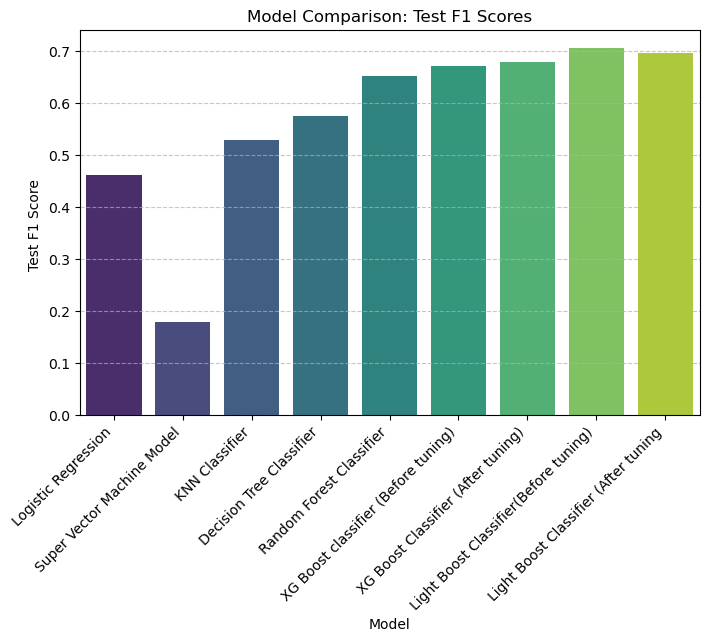

In [4]:
# Set the figure size
plt.figure(figsize=(8, 5))
sns.barplot(x='Model', y='Test F1 score', hue='Model', data=model_results, dodge=False, legend=False, palette='viridis')

# Labels and Title
plt.ylabel('Test F1 Score ')
plt.xlabel('Model')
plt.title('Model Comparison: Test F1 Scores')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Grid for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Visualiuzation of Test Accuracy scores of all models

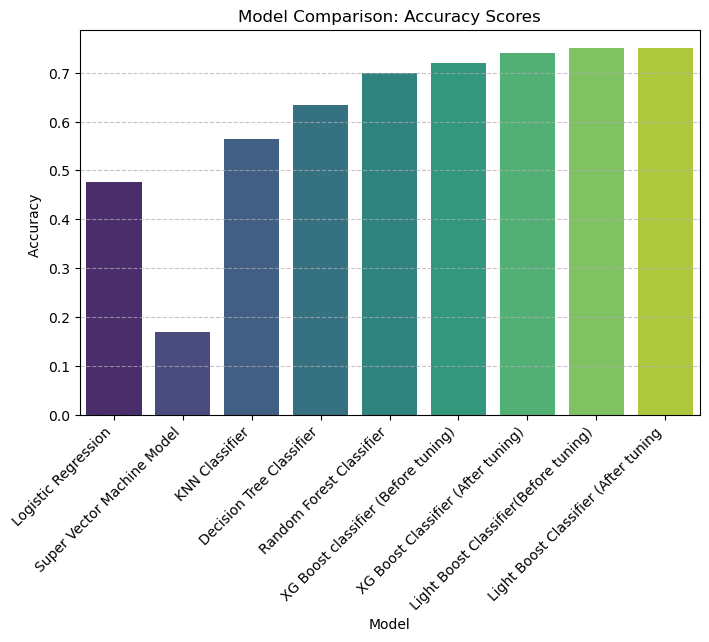

In [5]:

# Set the figure size
plt.figure(figsize=(8, 5))
sns.barplot(x='Model', y='Accuracy', hue='Model', data=model_results, dodge=False, legend=False, palette='viridis')

# Labels and Title
plt.ylabel('Accuracy ')
plt.xlabel('Model')
plt.title('Model Comparison: Accuracy Scores')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Grid for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


## Conclusion

* The Light Gradient Boost Model, trained with SMOTE-balanced data achieved a test accuracy of 75% and macro F1 score of 70.6% ~ 71%  on the Earthquake building damage prediction task.
* Class wise Performance was also good for Medium(1) and severely(2) damaged classes outperforms with a f1 score of (79%) and (71%) respectively. The model shows relatively low performance on low damage(0) class having f1 score of (62%) can be attributed to class imbalance in target and less future distinction in that category so model fails to identify it because lack of features and distinction between other classes.
* Despite quite class imbalance, Model demonstrates solid generalization across all classes, reflecting the effectiveness of Light Gradient Boosting approach on structured, balanced and tabular data.

  LGBoost's robust handling of feature interactions, its ability to mitigate overfitting through regularization, and its compatibility with imbalanced datasets make it a highly effective algorithm for this multiclass classification task. The model performed particularly well after feature engineering and resampling, with balanced precision and recall scores across categories. Future improvements can involve stacking with other tree-based models (like CatBoost or hyperparameter tuning of LightGBM), refining the input features using feature importance, or integrating spatial/geological features if available. Nonetheless, the current LGBoost setup delivers reliable, interpretable predictions that are well-suited for real-world deployment in post-earthquake damage assessment systems.